# COMPETICION SONRISAS Y LAGRIMAS

In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [2]:
import os
#habilita la aceleracion por hardware de mi grafica
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla=true"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import h5py
#from scipy.sparse import hstack
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer, FeatureHasher
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder, Normalizer,MaxAbsScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay,confusion_matrix, accuracy_score,recall_score,f1_score,precision_score,precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_sample_weight
from imblearn.over_sampling import RandomOverSampler
import shutil #para copiar archivos
from PIL import Image#para trabajar con imagenes
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Ftrl, Nadam, RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout,ReLU, BatchNormalization, GlobalAveragePooling2D, GlobalMaxPooling2D, AveragePooling2D,LeakyReLU, PReLU
from tensorflow.keras.layers import Softmax, Activation, Input, Concatenate, Add, Multiply, Subtract, Average, Maximum, Minimum, Dot, Reshape, Lambda, Conv2DTranspose, UpSampling2D, ZeroPadding2D
from tensorflow.keras.layers import  Cropping2D, SeparableConv2D, DepthwiseConv2D, LocallyConnected2D, Conv2DTranspose, concatenate, add, multiply, subtract, average, maximum, minimum, dot, Activation
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense,Dropout,ReLU, BatchNormalization, GlobalAveragePooling1D, GlobalMaxPooling1D, AveragePooling1D,LeakyReLU, PReLU
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional, TimeDistributed, ConvLSTM2D, Conv3D, MaxPooling3D, AveragePooling3D, GlobalAveragePooling3D, GlobalMaxPooling3D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint,ReduceLROnPlateau,CallbackList
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras import regularizers
from tensorflow.keras.losses import CategoricalCrossentropy, sparse_categorical_crossentropy, binary_crossentropy
from tensorflow.keras.layers import Activation
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.metrics import Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG19,VGG16, EfficientNetB0, EfficientNetB1, EfficientNetB2, EfficientNetB3, EfficientNetB4, resnet_v2, ResNet50, ResNet101, ResNet152, ResNet50V2, ResNet101V2, ResNet152V2, InceptionV3, InceptionResNetV2, Xception, MobileNet, MobileNetV2, DenseNet121, DenseNet169, DenseNet201, NASNetLarge, NASNetMobile 
import glob
import cv2
from concurrent.futures import ThreadPoolExecutor



# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [180]:
# Ruta al archivo 
file_path_train= "D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS"

# Directorio de las imágenes train
dir_train = r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\data_sonrisa\train"
dir_test = r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\data_sonrisa\test\images"

In [5]:
train_set= pd.read_csv(os.path.join(file_path_train,"train_set.csv"))

In [6]:
train_set= train_set.drop(columns=["Unnamed: 0"])

In [7]:
#conteo de imagenes train
train_set["label"].value_counts()

happy      7164
sadness    4938
Name: label, dtype: int64

<Axes: >

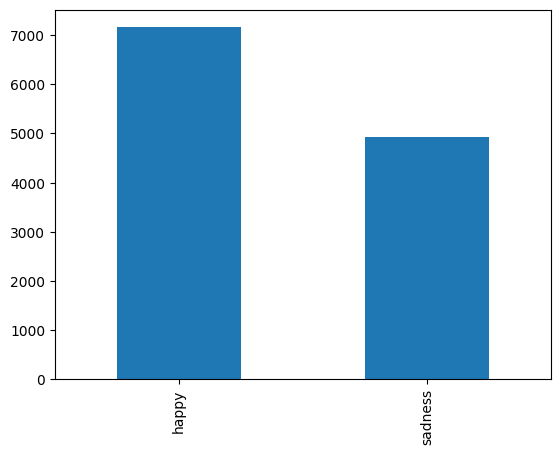

In [10]:
train_set["label"].value_counts().plot(kind="bar")

In [10]:
train_set.shape

(12102, 3)

In [7]:
import h5py
print(h5py.__file__)

c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\h5py\__init__.py


COMPROBAMOS LA RESOLUCION DE NUESTRAS IMAGENES

In [9]:

# Ruta al directorio de entrenamiento
train_dir = os.path.join(file_path_train, "data_sonrisa/train")

for raiz, directorios, archivos in os.walk(train_dir):#recorre la carpeta train_dir devolviendo la raiz, los directorios y los archivos
    for archivo in archivos:
        if archivo.endswith((".jpg", ".jpeg", ".png", ".bmp")):#si el archivo finaliza con alguna de estas extensiones
            ruta_imagen = os.path.join(raiz, archivo)
            imagen = Image.open(ruta_imagen)
            ancho, alto= imagen.size, imagen.mode
            print(f"Imagen: {os.path.relpath(ruta_imagen, train_dir)}")  # Imprime la ruta relativa
            print(f"Resolución: ({ancho}, {alto})")


Imagen: happy\100.jpg
Resolución: ((48, 48), L)
Imagen: happy\10000.jpg
Resolución: ((48, 48), L)
Imagen: happy\10001.jpg
Resolución: ((48, 48), L)
Imagen: happy\10005.jpg
Resolución: ((48, 48), L)
Imagen: happy\10035.jpg
Resolución: ((48, 48), L)
Imagen: happy\10039.jpg
Resolución: ((48, 48), L)
Imagen: happy\1004.jpg
Resolución: ((48, 48), L)
Imagen: happy\10042.jpg
Resolución: ((48, 48), L)
Imagen: happy\10046.jpg
Resolución: ((48, 48), L)
Imagen: happy\10050.jpg
Resolución: ((48, 48), L)
Imagen: happy\1006.jpg
Resolución: ((48, 48), L)
Imagen: happy\10060.jpg
Resolución: ((48, 48), L)
Imagen: happy\10066.jpg
Resolución: ((48, 48), L)
Imagen: happy\10071.jpg
Resolución: ((48, 48), L)
Imagen: happy\10083.jpg
Resolución: ((48, 48), L)
Imagen: happy\10092.jpg
Resolución: ((48, 48), L)
Imagen: happy\10094.jpg
Resolución: ((48, 48), L)
Imagen: happy\10098.jpg
Resolución: ((48, 48), L)
Imagen: happy\10102.jpg
Resolución: ((48, 48), L)
Imagen: happy\10104.jpg
Resolución: ((48, 48), L)
Imag

# VAMOS A PROBAR CON UN MODELO PROPIP BASICO ANTES DE USAR TRANSFER LEARNING

In [7]:
train_set

,id_img,paths,label
0,100,data\train\happy\100.jpg,happy
1,10000,data\train\happy\10000.jpg,happy
2,10001,data\train\happy\10001.jpg,happy
3,10005,data\train\happy\10005.jpg,happy
4,10035,data\train\happy\10035.jpg,happy
...,...,...,...
12097,9966,data\train\sadness\9966.jpg,sadness
12098,9974,data\train\sadness\9974.jpg,sadness
12099,9976,data\train\sadness\9976.jpg,sadness
12100,9986,data\train\sadness\9986.jpg,sadness


<Axes: >

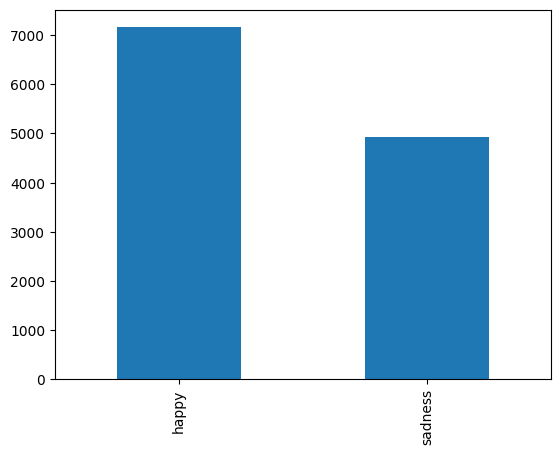

In [8]:
#pintamos solo label
train_set["label"].value_counts().plot(kind="bar")

Creamos un generador con las imaganes 

In [39]:
# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory('data_sonrisa/train', batch_size=32, target_size=(48, 48), class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory('data_sonrisa/train', batch_size=32, target_size=(48, 48), class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [19]:
for x, y in train_generator:
    print(x.shape, x.dtype) 
    break  # Imprime solo el primer lote

(32, 48, 48, 3) float32


In [15]:
train_generator.image_shape

(48, 48, 3)

RED

In [38]:
model_propio = Sequential([
    Conv2D(2048, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(1024, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [40]:
optimizador = Adamax(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax')

# Compilar el modelo
model_propio.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

reduce_rl=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)
early_stoppping=tf.keras.callbacks.EarlyStopping(monitor="loss", verbose=1, mode="auto", min_delta=0.0001, patience=15, restore_best_weights=True)

# Entrenar el modelo
model_propio.fit(train_generator, validation_data= validation_generator, epochs=100, steps_per_epoch=100, validation_steps=50)

Epoch 1/100
100/100 [==============================] - 46s 283ms/step - loss: 0.6849 - recall_3: 0.0000e+00 - val_loss: 0.6779 - val_recall_3: 0.0000e+00
Epoch 2/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6746 - recall_3: 0.0000e+00 - val_loss: 0.6759 - val_recall_3: 0.0000e+00
Epoch 3/100
100/100 [==============================] - 38s 378ms/step - loss: 0.6744 - recall_3: 0.0000e+00 - val_loss: 0.6832 - val_recall_3: 0.0000e+00
Epoch 4/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6728 - recall_3: 0.0000e+00 - val_loss: 0.6776 - val_recall_3: 0.0000e+00
Epoch 5/100
100/100 [==============================] - 29s 288ms/step - loss: 0.6710 - recall_3: 0.0000e+00 - val_loss: 0.6721 - val_recall_3: 0.0000e+00
Epoch 6/100
100/100 [==============================] - 31s 312ms/step - loss: 0.6758 - recall_3: 0.0000e+00 - val_loss: 0.6728 - val_recall_3: 0.0000e+00
Epoch 7/100
100/100 [==============================] - 29s 286ms/step - loss

In [41]:
model_propio.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 46, 46, 2048)      57344     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 23, 23, 2048)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 21, 21, 1024)      18875392  
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 10, 10, 1024)     0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 8, 8, 256)         2359552   
                                                                 
 max_pooling2d_42 (MaxPoolin  (None, 4, 4, 256)      

In [47]:
# Evaluar el modelo sin transfer learning
model_propio.evaluate(validation_generator)
y_pred = model_propio.predict(validation_generator)
# Convertir las predicciones a etiquetas dejando el umbral para poder a ajustarlo a la precision que queramos
y_pred = (y_pred > 0.4).astype(int)

print(classification_report(validation_generator.classes, y_pred))

76/76 [==============================] - 4s 58ms/step
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1432
           1       0.41      0.41      0.41       987

    accuracy                           0.51      2419
   macro avg       0.50      0.50      0.50      2419
weighted avg       0.52      0.51      0.51      2419



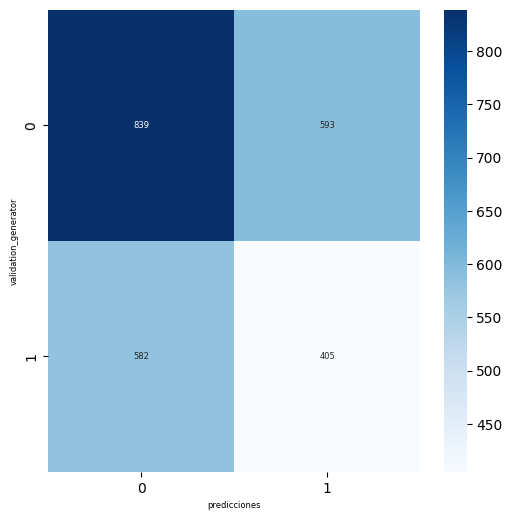

In [48]:
cm= confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt= ".0f", cmap="Blues")
plt.xlabel ("predicciones")
plt.ylabel ("validation_generator")
plt.show()

# MODELO GANADOR

In [8]:
# Cargar el modelo SUBIDO A KKAGGLE
model = load_model('modelos/1modelo_descongelado_inventado_imagenes_res.h5')

"""for layer in model.layers:
    print(layer.get_weights())"""

modelo_gan_mvnet=MobileNetV2(weights='imagenet', include_top=False, input_shape=(160, 160, 3))

for layer in modelo_gan_mvnet.layers[:-15]:
    layer.trainable = False
#modelo_gan_mvnet.trainable=True

ultima_capa = modelo_gan_mvnet.output
x= Flatten()(ultima_capa)
x = Dense(256, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
out = Dense(1, activation='sigmoid')(x)

modelo_gan_mvnet = Model(modelo_gan_mvnet.input, out)

optimizador = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adam')

modelo_gan_mvnet.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

modelo_gan_mvnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][0]']           

In [9]:
#vamos a convertir las imagenes de train mapeandolas para conseguir X e Y
main_dir = r'D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\data_sonrisa\train'

X = []
y = []

# con la funcion os_walk recorremos  cada subdirectorio en el directorio principal
for dirpath, dirnames, filenames in os.walk(main_dir):
    for filename in filenames:
        if filename.endswith((".jpg")):
            img_path = os.path.join(dirpath, filename)
            img = load_img(img_path, target_size=(160, 160))
            img_array = img_to_array(img)
            X.append(img_array)
            label = os.path.basename(dirpath)
            y.append(label)
  
# Convierte las listas en  arrays
X = np.array(X)
y = np.array(y)

In [109]:
y.shape

(12102,)

In [10]:
X.shape

(12102, 160, 160, 3)

In [11]:
# Supongamos que X es tu array de imágenes con forma (num_muestras, ancho, alto, canales)
num_muestras, ancho, alto, canales = X.shape

# Remodelamos X a (num_muestras, ancho*alto*canales)
X_2d = X.reshape(num_muestras, ancho*alto*canales)

# Ahora puedes aplicar RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_2d, y)

# Recuerda que debes remodelar X_resampled de nuevo a su forma original antes de usarlo para entrenar tu modelo
X_resampled = X_resampled.reshape(-1, ancho, alto, canales)

# Ahora divide los datos en conjuntos de entrenamiento y prueba
X_train_r, X_val_r, y_train_r, y_val_r = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



In [12]:
print(X_train_r.shape)
print(y_train_r.shape)
print(X_val_r.shape)
print(y_val_r.shape)

(11462, 160, 160, 3)
(11462,)
(2866, 160, 160, 3)
(2866,)


In [126]:
X_train_r.shape

(11462, 160, 160, 3)

In [13]:
#vamos a mapear y_train_r 
y_train_r = np.where(y_train_r == "happy", 0, 1)#si y_train cumpple con la condiccion happy=0 y despues cuando encuentre sadnes==1

In [128]:
y_train_r.shape

(11462,)

<Axes: ylabel='Count'>

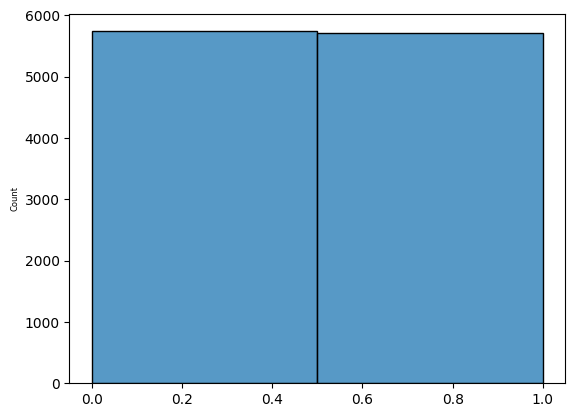

In [14]:
sns.histplot(y_train_r, bins=2, kde=False)

In [15]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="loss", verbose=1, mode="auto", min_delta=0.0001, patience=4, restore_best_weights=True)
callback=[reduce_lr, early_stopping]

In [16]:
optimizador = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adam')

modelo_gan_mvnet.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])
#aplicamos el modelo balaceado
with tf.device('/CPU:0'):
    historia_ganador_balanceado = model.fit(X_train_r, y_train_r, validation_split=0.2, epochs=20, callbacks=callback)

Epoch 1/20
287/287 [==============================] - 380s 1s/step - loss: 0.1185 - accuracy: 0.9732 - val_loss: 0.4326 - val_accuracy: 0.9001 - lr: 1.0000e-05
Epoch 2/20
287/287 [==============================] - 380s 1s/step - loss: 0.0429 - accuracy: 0.9852 - val_loss: 0.2059 - val_accuracy: 0.9459 - lr: 1.0000e-05
Epoch 3/20
287/287 [==============================] - 391s 1s/step - loss: 0.0231 - accuracy: 0.9924 - val_loss: 0.1303 - val_accuracy: 0.9651 - lr: 1.0000e-05
Epoch 4/20
287/287 [==============================] - 415s 1s/step - loss: 0.0192 - accuracy: 0.9943 - val_loss: 0.1009 - val_accuracy: 0.9717 - lr: 1.0000e-05
Epoch 5/20
287/287 [==============================] - 439s 2s/step - loss: 0.0105 - accuracy: 0.9971 - val_loss: 0.0935 - val_accuracy: 0.9747 - lr: 1.0000e-05
Epoch 6/20
287/287 [==============================] - 406s 1s/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 0.0921 - val_accuracy: 0.9786 - lr: 1.0000e-05
Epoch 7/20
287/287 [====================

In [17]:
# Convertir y_val_r a números
y_val_r = np.where(y_val_r == "happy", 0, 1)

# Evaluar el modelo
with tf.device('/CPU:0'):
    model.evaluate(X_val_r, y_val_r)
    y_pred = model.predict(X_val_r)
y_pred = (y_pred > 0.5).astype(int)


print(classification_report(y_val_r, y_pred))

#guardar el modelo 
modelo_gan_mvnet.save("model_ganador_recupera_1.h5")

90/90 [==============================] - 21s 226ms/step
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1422
           1       0.98      0.99      0.98      1444

    accuracy                           0.98      2866
   macro avg       0.98      0.98      0.98      2866
weighted avg       0.98      0.98      0.98      2866



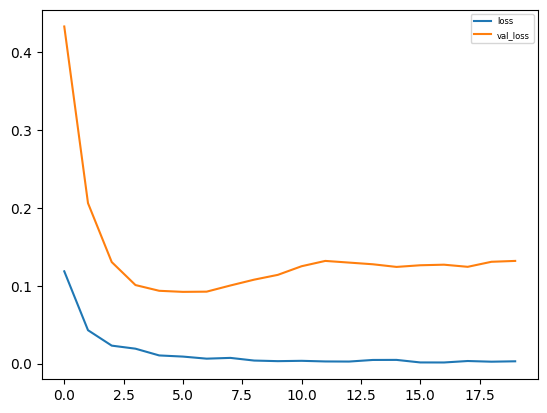

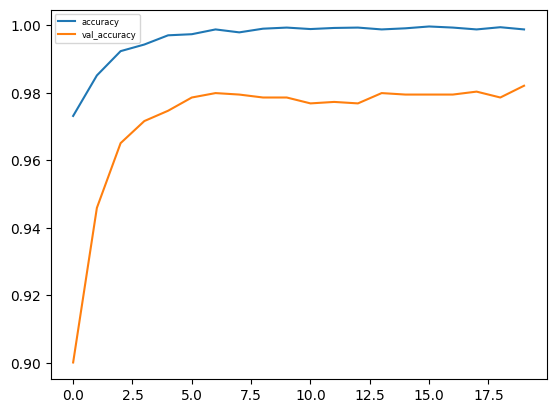

In [18]:
df_history=pd.DataFrame(historia_ganador_balanceado.history)
df_history[["loss", "val_loss"]].plot()
df_history[["accuracy", "val_accuracy"]].plot()
plt.show()

GUARDAMOS PREDICCIONES

In [19]:
test_2= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test_2.drop(columns={"Unnamed: 0"}, inplace=True)
test_2.drop(columns={"paths"}, inplace=True)

df_test=pd.DataFrame({'label': y_pred.flatten()})

predicciones=pd.concat([test_2, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_10_prediccion_recupera1.csv", index=False)

EVALUACION CONTRA TEST

In [135]:
test= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test.drop(columns={"Unnamed: 0"}, inplace=True)
test.drop(columns={"paths"}, inplace=True)
test.head(2)

,id_img
0,10019
1,10023


In [136]:
model_test=load_model('model_ganador_recupera_1.h5')

test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

test_id_img = test['id_img'].values
test_label = y_val_r

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) #convertir filename a str para que pueda leer la imagen y extension
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) 
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)

# Crear una lista vacía para almacenar las imágenes RGB
test_images_rgb = []

# Iterar sobre todas las imágenes
for img in test_images:
    # Convertir la imagen a 32 bits de profundidad
    img = img.astype(np.float32)
    # Convertir la imagen a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
    # Redimensionar la imagen a (160, 160)
    img_rgb_resized = cv2.resize(img_rgb, (160, 160))
    # Añadir la imagen a la lista de imágenes RGB
    test_images_rgb.append(img_rgb_resized)
    
#connversimo la lista en un array
test_images_rgb = np.array(test_images_rgb)

# Hacer predicciones con el modelo
y_pred = model_test.predict(test_images_rgb)
y_pred = (y_pred > 0.5).astype(int)

y_pred=y_pred[:len(test_label)]

# Calcular la precisión y el recall
accuracy = accuracy_score(test_label, y_pred)
recall = recall_score(test_label, y_pred)

print(classification_report(test_label, y_pred))



93/93 [==============================] - 3s 18ms/step
              precision    recall  f1-score   support

           0       0.50      0.40      0.45      1422
           1       0.51      0.61      0.55      1444

    accuracy                           0.51      2866
   macro avg       0.51      0.51      0.50      2866
weighted avg       0.51      0.51      0.50      2866



GUARDAMOS PREDICCIONES

In [104]:
y_val_r

array([0, 0, 0, ..., 1, 0, 1])

In [137]:
df_test=pd.DataFrame({'label': y_pred.flatten()})

#test1.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_9_prediccion_recupera1.csv", index=False)

# MODELO VGG16

In [162]:
#hago transer learning con VGG16, caragando los pesos de imagenet y sin usar la capa densa final
model_vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in model_vgg16.layers[:-3]:
    layer.trainable = False

ultima_capa=model_vgg16.output
x= Flatten() (ultima_capa)
x = Dense (1024, activation="relu")(x)
x = Dense (1024, activation="relu")(x)
x = Dense (512, activation="relu")(x)
predicciones = Dense(1, activation="sigmoid")(x)

model_vgg16 = Model(inputs=model_vgg16.input, outputs=predicciones)

model_vgg16.summary()


Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0  

In [163]:
# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory(os.path.dirname(dir_train), batch_size=32, target_size=(48, 48), class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(os.path.dirname(dir_train), batch_size=32, target_size=(48, 48), class_mode='binary', subset='validation')

Found 12054 images belonging to 2 classes.
Found 3012 images belonging to 2 classes.


In [164]:
# Compilar el modelo
optimizador= Adadelta(learning_rate=0.00001, rho=0.95, epsilon=1e-07, name='Adadelta')
model_vgg16.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])
reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)
early_stoppping=tf.keras.callbacks.EarlyStopping(monitor="loss", verbose=1, mode="auto", min_delta=0.0001, patience=15, restore_best_weights=True)
callback=[reduce_lr, early_stopping]

historia8= model_vgg16.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=callback)

Epoch 1/100
377/377 [==============================] - 46s 121ms/step - loss: 0.8774 - recall_38: 0.0000e+00 - val_loss: 0.8693 - val_recall_38: 0.0000e+00 - lr: 1.0000e-05
Epoch 2/100
377/377 [==============================] - 41s 110ms/step - loss: 0.8604 - recall_38: 0.0000e+00 - val_loss: 0.8502 - val_recall_38: 0.0000e+00 - lr: 1.0000e-05
Epoch 3/100
377/377 [==============================] - 43s 113ms/step - loss: 0.8406 - recall_38: 0.0000e+00 - val_loss: 0.8303 - val_recall_38: 0.0000e+00 - lr: 1.0000e-05
Epoch 4/100
377/377 [==============================] - 40s 107ms/step - loss: 0.8214 - recall_38: 0.0000e+00 - val_loss: 0.8109 - val_recall_38: 0.0000e+00 - lr: 1.0000e-05
Epoch 5/100
377/377 [==============================] - 40s 107ms/step - loss: 0.8015 - recall_38: 0.0000e+00 - val_loss: 0.7908 - val_recall_38: 0.0000e+00 - lr: 1.0000e-05
Epoch 6/100
377/377 [==============================] - 41s 108ms/step - loss: 0.7822 - recall_38: 0.0000e+00 - val_loss: 0.7709 - val_r

In [168]:
# Evaluar el modelo vgg16
#model_vgg16.evaluate(validation_generator)
y_pred = model_vgg16.predict(validation_generator)
y_pred = (y_pred > 0.5).astype(int)
print(classification_report(validation_generator.classes, y_pred))

#GUARDAR modelo
model_vgg16.save(r"D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos/modelo_vgg16_3.h5")

95/95 [==============================] - 8s 80ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.80      1.00      0.89      2420

    accuracy                           0.80      3012
   macro avg       0.40      0.50      0.45      3012
weighted avg       0.65      0.80      0.72      3012



c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


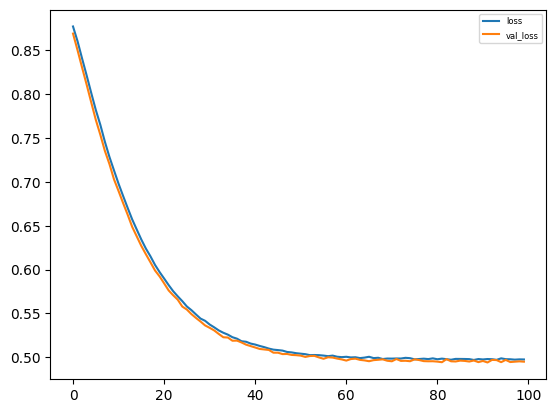

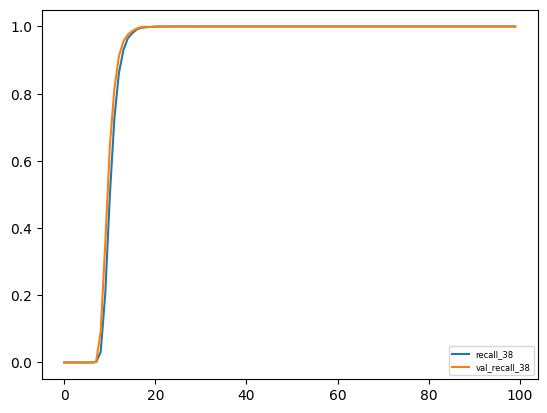

In [170]:
df_history=pd.DataFrame(historia8.history)
df_history[["loss", "val_loss"]].plot()
df_history[["recall_38", "val_recall_38"]].plot()
plt.show()

GUARDAMOS PREDICCIONES

In [171]:
test_3= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test_3.drop(columns={"Unnamed: 0"}, inplace=True)
test_3.drop(columns={"paths"}, inplace=True)

df_test1=pd.DataFrame({'label': y_pred.flatten()})

predicciones=pd.concat([test_3, df_test1], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_20_modelo_vgg16_2.csv", index=False)

In [174]:
model_test=load_model(r"D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\modelo_vgg16_3.h5")

test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

test_id_img = test_3['id_img'].values
test_label = validation_generator.classes

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) #convertir filename a str para que pueda leer la imagen y extension
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) 
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)

# Convertir las imágenes de escala de grises a RGB
test_images_rgb = np.stack([test_images]*3, axis=-1)

# Hacer predicciones con el modelo
y_pred = model_test.predict(test_images_rgb)
y_pred = (y_pred > 0.5).astype(int)

test_label=test_label[:len(y_pred)]


print(classification_report(test_label, y_pred))

93/93 [==============================] - 3s 26ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       592
           1       0.80      1.00      0.89      2372

    accuracy                           0.80      2964
   macro avg       0.40      0.50      0.44      2964
weighted avg       0.64      0.80      0.71      2964



c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
test_3= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test_3.drop(columns={"Unnamed: 0"}, inplace=True)
test_3.drop(columns={"paths"}, inplace=True)

df_test1=pd.DataFrame({'label': y_pred.flatten()})

predicciones=pd.concat([test_3, df_test1], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_21_modelo_vgg16T_2.csv", index=False)

# MODELO MobileNetV2

In [177]:

# Cargar el modelo preentrenado MobileNetV2
model_mobileNetV2 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

for layer in model_mobileNetV2.layers[:-3]:#la predciion que me dio 0.93 en jkaggle era con -3 
    layer.trainable = False


ultima_capa = model_mobileNetV2.output
x = Flatten()(ultima_capa)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
out= Dense(1, activation='sigmoid')(x)

# Añadir nuestro modelo personalizado a la base
model_mobileNetV2 = Model(inputs=model_mobileNetV2.input, outputs=out)

print(model_mobileNetV2.summary())

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_34 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_34[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                                           

In [184]:
# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory(dir_train, batch_size=32, target_size=(48, 48), class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(dir_train, batch_size=32, target_size=(48, 48), class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [185]:
validation_generator.class_indices

{'happy': 0, 'sadness': 1}

In [186]:
#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)
#detiene el entrenamiento si la metrica no mejora 
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(monitor="loss", verbose=1, mode="auto", min_delta=0.0001, patience=15, restore_best_weights=True)

callbacks_list = [reduce_lr, early_stopping_callbacks]

optimizador=Adadelta(
    learning_rate=0.00001, # Tasa de aprendizaje
    rho=0.95, # Factor de decaimiento de la media móvil del gradiente
    epsilon=1e-07, # Factor de estabilidad numérica para evitar la división por cero
    name='Adadelta')
#optimizador=Adamax(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax'
#optimizador = Adam(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adam')

# Compilar el modelo
model_mobileNetV2.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

# Entrenar el modelo
historia=model_mobileNetV2.fit(train_generator, validation_data=validation_generator, epochs=200, callbacks=callbacks_list)

Epoch 1/200
303/303 [==============================] - 35s 106ms/step - loss: 0.7481 - recall_39: 0.2954 - val_loss: 0.7130 - val_recall_39: 0.3587 - lr: 1.0000e-05
Epoch 2/200
303/303 [==============================] - 32s 106ms/step - loss: 0.7457 - recall_39: 0.2888 - val_loss: 0.7122 - val_recall_39: 0.3526 - lr: 1.0000e-05
Epoch 3/200
303/303 [==============================] - 35s 114ms/step - loss: 0.7543 - recall_39: 0.2825 - val_loss: 0.7035 - val_recall_39: 0.3242 - lr: 1.0000e-05
Epoch 4/200
303/303 [==============================] - 32s 106ms/step - loss: 0.7528 - recall_39: 0.2994 - val_loss: 0.7091 - val_recall_39: 0.3425 - lr: 1.0000e-05
Epoch 5/200
303/303 [==============================] - 34s 111ms/step - loss: 0.7541 - recall_39: 0.2820 - val_loss: 0.7103 - val_recall_39: 0.2766 - lr: 1.0000e-05
Epoch 6/200
303/303 [==============================] - 33s 108ms/step - loss: 0.7435 - recall_39: 0.3035 - val_loss: 0.7160 - val_recall_39: 0.2796 - lr: 1.0000e-05
Epoch 7/20

In [194]:
# Obtener las predicciones del modelo en el conjunto de validación
y_pred_prob = model_mobileNetV2.predict(validation_generator)
# Convertir las probabilidades en etiquetas de clase binarias, estableciendo un threhold de 0,5
#y_pred = (y_pred_prob > 0.4).astype(int)# modifico el y_pred_prob para conseguir un mejor rendimiento y evitar falsos negativos
y_pred_classes = np.argmax(y_pred_prob, axis=1)

# Calcular las métricas de rendimiento
confusion = confusion_matrix(validation_generator.classes, y_pred)

print("classification_report:\n",classification_report(validation_generator.classes, y_pred))
print(f"Confusion matrix:\n{confusion}")

#guaardar el modelo
model_mobileNetV2.save(r"D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\base_model_descongelado_inventado_imagenes4.h5")

76/76 [==============================] - 6s 77ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.60      0.47      0.53      1432
           1       0.41      0.54      0.47       987

    accuracy                           0.50      2419
   macro avg       0.51      0.51      0.50      2419
weighted avg       0.52      0.50      0.50      2419

Confusion matrix:
[[675 757]
 [450 537]]


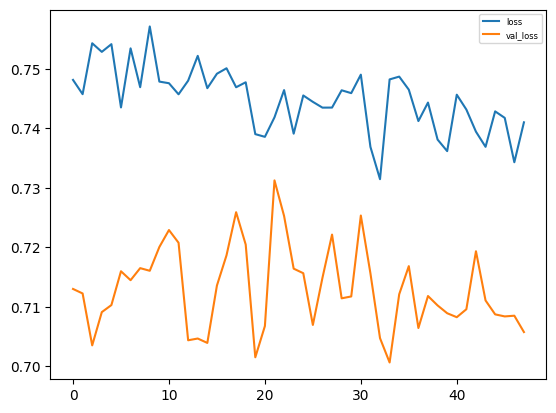

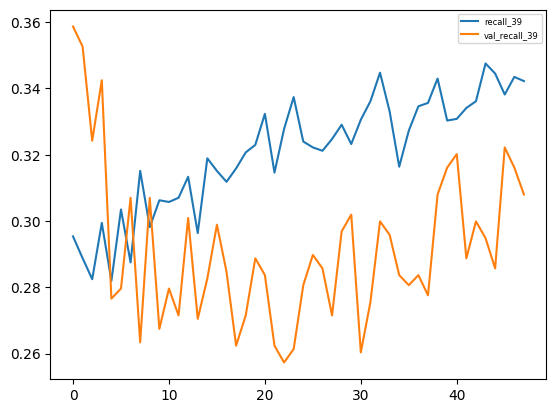

In [193]:
df_history=pd.DataFrame(historia.history)
df_history[["loss", "val_loss"]].plot()
df_history[["recall_39", "val_recall_39"]].plot()
plt.show()

GUARDAMOS MODELO

In [195]:
test_4= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test_4.drop(columns={"Unnamed: 0"}, inplace=True)
test_4.drop(columns={"paths"}, inplace=True)

df_test2=pd.DataFrame({'label': y_pred.flatten()})

predicciones=pd.concat([test_4, df_test2], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_20_predicciones_mobileNet3.csv", index=False)

PROBAMOS CONTRA TEST

In [203]:
with tf.device('/CPU:0'):
    model_test=load_model(r"D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\base_model_descongelado_inventado_imagenes4.h5")

    test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

    test_id_img = test_4['id_img'].values
    test_label = validation_generator.classes

    # Crear una lista vacía para almacenar las imágenes
    test_images = []

    # Iterar sobre todos los nombres de los archivos
    for filename in test_id_img:
        # Cargar la imagen
        img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) #convertir filename a str para que pueda leer la imagen y extension
        # Convertir la imagen a un array de numpy y normalizarla
        img = np.array(img) / 255.0
        # Añadir la imagen a la lista de imágenes
        test_images.append(img)

    # Convertir la lista de imágenes en un array de numpy
    test_images = np.array(test_images)
    test_images = []

    # Iterar sobre todos los nombres de los archivos
    for filename in test_id_img:
        # Cargar la imagen
        img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) 
        # Convertir la imagen a un array de numpy y normalizarla
        img = np.array(img) / 255.0
        # Añadir la imagen a la lista de imágenes
        test_images.append(img)

    # Convertir la lista de imágenes en un array de numpy
    test_images = np.array(test_images)

    # Convertir las imágenes de escala de grises a RGB
    test_images_rgb = np.stack([test_images]*3, axis=-1)

    # Hacer predicciones con el modelo
    y_pred = model_test.predict(test_images_rgb)
    y_pred = (y_pred > 0.4).astype(int)

    y_pred=y_pred[:len(test_label)]

    # Calcular la precisión y el recall
    accuracy = accuracy_score(test_label, y_pred)
    recall = recall_score(test_label, y_pred)

    print(classification_report(test_label, y_pred))



93/93 [==============================] - 12s 104ms/step
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      1432
           1       0.42      0.40      0.41       987

    accuracy                           0.53      2419
   macro avg       0.51      0.51      0.51      2419
weighted avg       0.52      0.53      0.52      2419



In [206]:
test_4t= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test_4t.drop(columns={"Unnamed: 0"}, inplace=True)
test_4t.drop(columns={"paths"}, inplace=True)

df_test2t=pd.DataFrame({'label': y_pred.flatten()})

predicciones=pd.concat([test_4t, df_test2t], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_21_prediccionesT.csv", index=False)

TEST MODLEO DESCONGELADO INVENTADO 2

In [22]:
test= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test.drop(columns=["Unnamed: 0"], inplace=True)
test.head(2)

,id_img,paths
0,10019,data/test/10019.jpg
1,10023,data/test/10023.jpg


In [29]:

model_test=load_model('base_model_descongelado_inventado_imagenes2.h5')

test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

test_id_img = test['id_img'].values
test_label = validation_generator.classes

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) #convertir filename a str para que pueda leer la imagen y extension
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) 
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)

# Convertir las imágenes de escala de grises a RGB
test_images_rgb = np.stack([test_images]*3, axis=-1)

# Hacer predicciones con el modelo
y_pred = model_test.predict(test_images_rgb)
y_pred = (y_pred > 0.5).astype(int)

y_pred=y_pred[:len(test_label)]

# Calcular la precisión y el recall
accuracy = accuracy_score(test_label, y_pred)
recall = recall_score(test_label, y_pred)

print(classification_report(test_label, y_pred))

93/93 [==============================] - 2s 9ms/step
              precision    recall  f1-score   support

           0       0.59      0.61      0.60      1432
           1       0.40      0.38      0.39       987

    accuracy                           0.52      2419
   macro avg       0.50      0.50      0.50      2419
weighted avg       0.51      0.52      0.52      2419



GUARDO PREDICIONES

In [46]:
df_test=pd.DataFrame({'label': y_pred.flatten()})

test.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_4_prediccion.csv", index=False)

{'happy': 0, 'sadness': 1}

GRAFICOS MODELO DESCONGELADO INVENTADO 2

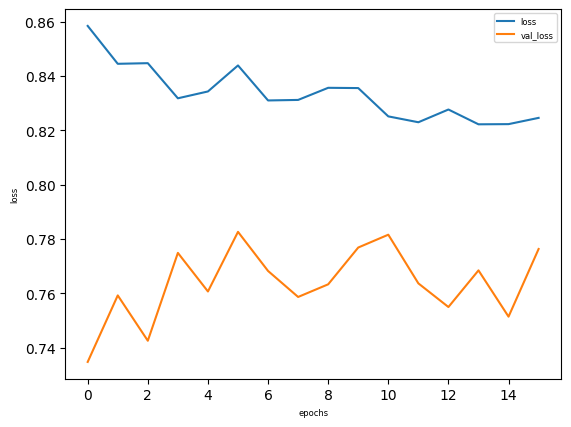

In [16]:
df_history = pd.DataFrame(historia1.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");



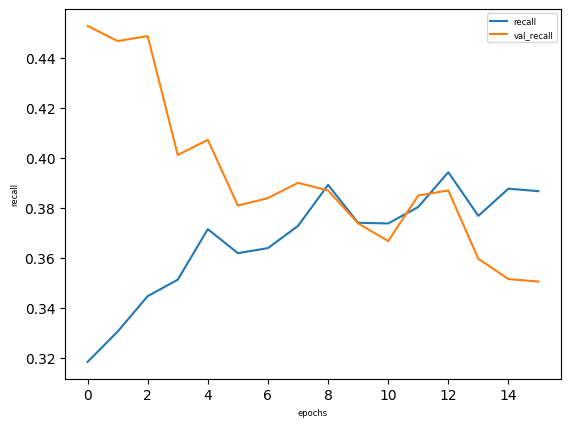

In [19]:
df_history = pd.DataFrame(historia1.history)
df_history[["recall","val_recall"]].plot();
plt.xlabel("epochs")
plt.ylabel("recall");

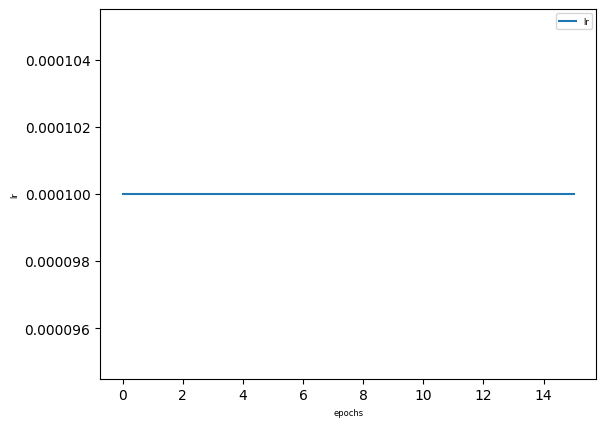

In [20]:
df_history = pd.DataFrame(historia1.history)
df_history[["lr"]].plot();
plt.xlabel("epochs")
plt.ylabel("lr");

SUBIDO A KAGGLE CON PUNTUACION GINAL 0.9311<BR>
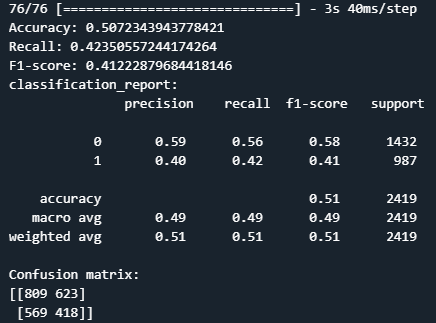

In [34]:
# Ajustar el umbral de decisión para mejorar el recall
threshold = 0.5
y_pred_adjusted = (y_pred_prob > threshold).astype(int)

# Calcular las métricas de rendimiento con el umbral ajustado
accuracy_adjusted = accuracy_score(validation_generator.classes, y_pred_adjusted)
recall_adjusted = recall_score(validation_generator.classes, y_pred_adjusted)
f1_adjusted = f1_score(validation_generator.classes, y_pred_adjusted)
confusion_adjusted = confusion_matrix(validation_generator.classes, y_pred_adjusted)

print(f"Adjusted Accuracy: {accuracy_adjusted}")
print(f"Adjusted Recall: {recall_adjusted}")
print(f"Adjusted F1-score: {f1_adjusted}")
print("classification_report:\n",classification_report(validation_generator.classes, y_pred))
print(f"Adjusted Confusion matrix:\n{confusion_adjusted}")

Adjusted Accuracy: 0.5423728813559322
Adjusted Recall: 0.3191489361702128
Adjusted F1-score: 0.36269430051813467
classification_report:
               precision    recall  f1-score   support

           0       0.60      0.70      0.64      1432
           1       0.42      0.32      0.36       987

    accuracy                           0.54      2419
   macro avg       0.51      0.51      0.50      2419
weighted avg       0.52      0.54      0.53      2419

Adjusted Confusion matrix:
[[997 435]
 [672 315]]


<Axes: ylabel='Count'>

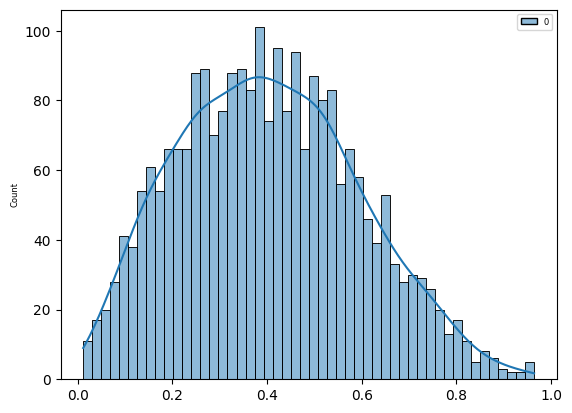

In [35]:
sns.histplot(y_pred_prob, bins=50, kde=True)#DE ORIGEN

ESAMBLAJE DE MODELOS MOBILENETV2 Y VGG16

In [68]:
# Cargar el modelo preentrenado MobileNetV2
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#abrirmos las ultimas 20 capas del modelo
for layer in base_model1.layers[:-150]:
    layer.trainable = False

# Cargar el modelo preentrenado VGG16
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#abrirmos las ultimas 20 capas del modelo
for layer in base_model2.layers[:-4]:
    layer.trainable = False
print(base_model1.summary())



Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_33 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 24, 24, 32)   864         ['input_33[0][0]']               
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 24, 24, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 24, 24, 32)   0           ['bn_Conv1[0][0]']               
                                                                               

In [69]:
print(base_model2.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [70]:
# Crear la parte personalizada del modelo para MobileNetV2
ultima_capa1 = base_model1.output
x1 = Flatten()(ultima_capa1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dense(512, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
out1 = Dense(1, activation='sigmoid')(x1)

# Crear la parte personalizada del modelo para VGG16
ultima_capa2 = base_model2.output
x2 = Flatten()(ultima_capa2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
out2 = Dense(1, activation='sigmoid')(x2)

# Crear los modelos personalizados
model_custom1 = Model(inputs=base_model1.input, outputs=out1)
model_custom2 = Model(inputs=base_model2.input, outputs=out2)

# Compilar los modelos
optimizador=Adadelta(learning_rate=0.00001, rho=0.95, epsilon=1e-07, name='Adadelta')
model_custom1.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])
model_custom2.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])


In [71]:

# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [72]:
#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=15, verbose=1)
#detiene el entrenamiento si la metrica no mejora 
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)

callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]

# Compilar el modelo
model_custom.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=[Recall()])

# Entrenar los modelos (aquí necesitarías proporcionar tus datos de entrenamiento y validación)
historia_ensamble1=model_custom1.fit(train_generator, validation_data=validation_generator, epochs=200, callbacks=callbacks_list)


Epoch 1/200


303/303 [==============================] - 26s 73ms/step - loss: 0.8278 - recall_5: 0.1121 - val_loss: 0.7882 - val_recall_5: 0.0223 - lr: 1.0000e-05
Epoch 2/200
303/303 [==============================] - 25s 83ms/step - loss: 0.8141 - recall_5: 0.1245 - val_loss: 0.7180 - val_recall_5: 0.0547 - lr: 1.0000e-05
Epoch 3/200
303/303 [==============================] - 26s 86ms/step - loss: 0.8286 - recall_5: 0.1276 - val_loss: 0.6962 - val_recall_5: 0.0659 - lr: 1.0000e-05
Epoch 4/200
303/303 [==============================] - 26s 85ms/step - loss: 0.8170 - recall_5: 0.1245 - val_loss: 0.7092 - val_recall_5: 0.0912 - lr: 1.0000e-05
Epoch 5/200
303/303 [==============================] - 28s 92ms/step - loss: 0.8172 - recall_5: 0.1324 - val_loss: 0.7103 - val_recall_5: 0.1155 - lr: 1.0000e-05
Epoch 6/200
303/303 [==============================] - 24s 78ms/step - loss: 0.7962 - recall_5: 0.1288 - val_loss: 0.7083 - val_recall_5: 0.1023 - lr: 1.0000e-05
Epoch 7/200
303/303 [===================

In [74]:
y_pred1 = model_custom1.predict(validation_generator)
y_pred1 = (y_pred1 > 0.4).astype(int)     

# Evaluar el modelo
print(classification_report(validation_generator.classes, y_pred1))   

76/76 [==============================] - 4s 55ms/step
              precision    recall  f1-score   support

           0       0.59      0.53      0.56      1432
           1       0.41      0.48      0.44       987

    accuracy                           0.51      2419
   macro avg       0.50      0.50      0.50      2419
weighted avg       0.52      0.51      0.51      2419



In [75]:
historia_ensamble2=model_custom2.fit(train_generator, validation_data=validation_generator, epochs=200, callbacks=callbacks_list)

Epoch 1/200


303/303 [==============================] - 25s 79ms/step - loss: 0.7043 - recall_6: 0.6434 - val_loss: 0.6938 - val_recall_6: 0.7882 - lr: 1.0000e-06
Epoch 2/200
303/303 [==============================] - 22s 71ms/step - loss: 0.7052 - recall_6: 0.6365 - val_loss: 0.6950 - val_recall_6: 0.7538 - lr: 1.0000e-06
Epoch 3/200
303/303 [==============================] - 23s 76ms/step - loss: 0.7032 - recall_6: 0.6335 - val_loss: 0.6957 - val_recall_6: 0.7781 - lr: 1.0000e-06
Epoch 4/200
303/303 [==============================] - 23s 76ms/step - loss: 0.7056 - recall_6: 0.6214 - val_loss: 0.6929 - val_recall_6: 0.7801 - lr: 1.0000e-06
Epoch 5/200
303/303 [==============================] - 22s 71ms/step - loss: 0.7044 - recall_6: 0.6457 - val_loss: 0.6942 - val_recall_6: 0.7690 - lr: 1.0000e-06
Epoch 6/200
303/303 [==============================] - 23s 77ms/step - loss: 0.7010 - recall_6: 0.6393 - val_loss: 0.6955 - val_recall_6: 0.7619 - lr: 1.0000e-06
Epoch 7/200
303/303 [===================

In [77]:
y_pred2 = model_custom2.predict(validation_generator)
y_pred2 = (y_pred2 > 0.5).astype(int)

# Evaluar el modelo
print(classification_report(validation_generator.classes, y_pred2))  

76/76 [==============================] - 4s 58ms/step
              precision    recall  f1-score   support

           0       0.58      0.34      0.43      1432
           1       0.40      0.65      0.50       987

    accuracy                           0.47      2419
   macro avg       0.49      0.50      0.46      2419
weighted avg       0.51      0.47      0.46      2419



In [78]:
y_pred1 = model_custom1.predict(validation_generator)
y_pred1 = (y_pred1 > 0.4).astype(int)              
y_pred2 = model_custom2.predict(validation_generator)
y_pred2 = (y_pred2 > 0.4).astype(int)
final_predictions = ((y_pred1 + y_pred2) / 2).round().astype(int)

# Evaluar el modelo
print(classification_report(validation_generator.classes, final_predictions.flatten()))

#guardar la siuma de los dos modelos 


76/76 [==============================] - 4s 56ms/step
              precision    recall  f1-score   support

           0       0.59      0.54      0.56      1432
           1       0.40      0.45      0.43       987

    accuracy                           0.50      2419
   macro avg       0.49      0.49      0.49      2419
weighted avg       0.51      0.50      0.51      2419



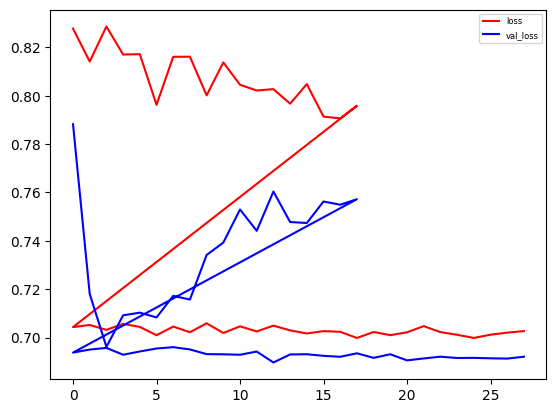

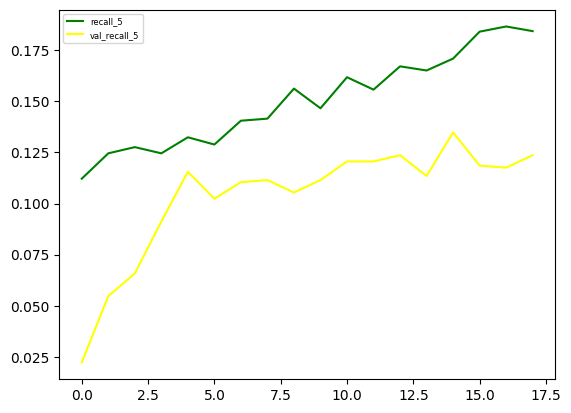

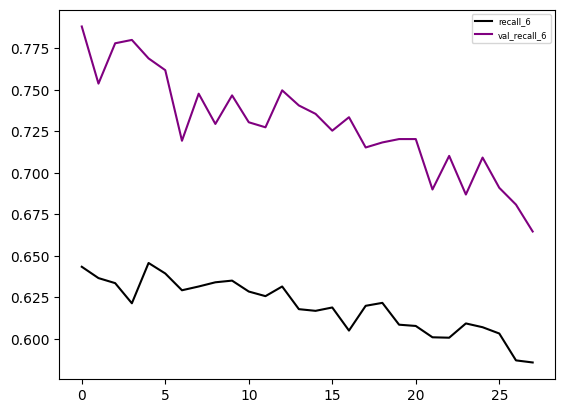

In [81]:
df_history = pd.concat([pd.DataFrame(historia_ensamble1.history), pd.DataFrame(historia_ensamble2.history)], axis=0)
df_history[["loss", "val_loss"]].plot(color=["red", "blue"])
df_history[["recall_5", "val_recall_5"]].plot(color=["green", "yellow"])
df_history[["recall_6", "val_recall_6"]].plot(color=["black", "purple"])
plt.show()

GUARDAMOS

In [96]:
test7=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test7=pd.DataFrame({'label': final_predictions.flatten()})

test7.drop(columns=["Unnamed: 0"], inplace=True)

test7.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test7, df_test7], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_14_prediccion.csv", index=False)


PROBAMOS CONTRA TEST

In [101]:
test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

test_id_img = test7['id_img'].values
test_label = validation_generator.classes

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) #convertir filename a str para que pueda leer la imagen y extension
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) 
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)

# Convertir las imágenes de escala de grises a RGB
test_images_rgb = np.stack([test_images]*3, axis=-1)

# Hacer predicciones con el modelo
y_pred = model_test.predict(test_images_rgb)
y_pred = (y_pred > 0.4).astype(int)

y_pred=y_pred[:len(test_label)]

# Calcular la precisión y el recall
accuracy = accuracy_score(test_label, y_pred)
recall = recall_score(test_label, y_pred)

print(classification_report(test_label, y_pred))

93/93 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

           0       0.65      0.87      0.75      1432
           1       0.64      0.33      0.44       987

    accuracy                           0.65      2419
   macro avg       0.64      0.60      0.59      2419
weighted avg       0.65      0.65      0.62      2419



In [103]:
test8=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test8=pd.DataFrame({'label': y_pred.flatten()})

test8.drop(columns=["Unnamed: 0"], inplace=True)

test8.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test8, df_test8], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_15_prediccionT.csv", index=False)

# PROBAR BALANCEANDO

In [7]:
# AL ESTAR MUY DESBALANCEADO VAMOS A PROBAR DIFERENTES TECNICAS DE BALANCEO
#conteo de imagenes train
train_set["label"].value_counts()

happy      7164
sadness    4938
Name: label, dtype: int64

In [10]:
# tengo los datos de train y validation
X = train_generator
y = validation_generator.classes

# Crea un objeto RandomOverSampler con la proporción deseada de sobremuestreo
ros = RandomOverSampler(sampling_strategy='minority')

# Inicializa listas vacías para almacenar los datos sobremuestreados
X_resampled = []
y_resampled = []

# Itera sobre los lotes en el generador de entrenamiento por problemas de memoria GPU
for i in range(len(train_generator)):
    # Obtiene el lote actual
    X_batch, y_batch = train_generator[i]
    
    # Aplica el sobremuestreo al lote actual, haciendo  que la imagen sea un vector de 1D  
    X_res_batch, y_res_batch = ros.fit_resample(X_batch.reshape(X_batch.shape[0], -1), y_batch)
    # Reajusta las dimensiones del lote sobremuestreado para que coincidan con el lote original siendo 4 dimensiones
    X_res_batch = X_res_batch.reshape(X_res_batch.shape[0], X_batch.shape[1], X_batch.shape[2], X_batch.shape[3])
    
    # Agrega los datos sobremuestreados a las listas
    X_resampled.append(X_res_batch)
    y_resampled.append(y_res_batch)

# Convierte las listas a arrays 
X_resampled = np.concatenate(X_resampled)
y_resampled = np.concatenate(y_resampled)



In [11]:
X_resampled.shape, y_resampled.shape

((11734, 48, 48, 3), (11734,))

<Axes: ylabel='Count'>

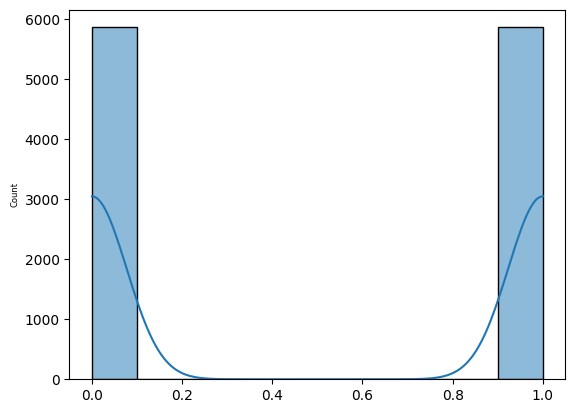

In [12]:
sns.histplot(y_resampled, bins=10, kde=True)#resampling

In [13]:
#split de los datos resampleados
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [14]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((9387, 48, 48, 3), (2347, 48, 48, 3), (9387,), (2347,))

In [16]:
# Cargar el modelo preentrenado MobileNetV2
base_model1 = MobileNetV2(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#abrirmos las ultimas 20 capas del modelo
for layer in base_model1.layers[:-150]:
    layer.trainable = False

# Cargar el modelo preentrenado VGG16
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#abrirmos las ultimas 20 capas del modelo
for layer in base_model2.layers[:-4]:
    layer.trainable = False
#print(base_model1.summary())


In [18]:
# Crear la parte personalizada del modelo para MobileNetV2
ultima_capa1 = base_model1.output
x1 = Flatten()(ultima_capa1)
x1 = Dense(256, activation='relu')(x1)
x1 = Dense(128, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
out1 = Dense(1, activation='sigmoid')(x1)

# Crear la parte personalizada del modelo para VGG16
ultima_capa2 = base_model2.output
x2 = Flatten()(ultima_capa2)
x2 = Dense(256, activation='relu')(x2)
x2 = Dense(128, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
out2 = Dense(1, activation='sigmoid')(x2)

# Crear los modelos personalizados
model_custom1 = Model(inputs=base_model1.input, outputs=out1)
model_custom2 = Model(inputs=base_model2.input, outputs=out2)

#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=15, verbose=1)
#detiene el entrenamiento si la metrica no mejora 
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)

callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]

# Compilar el modelo
optimizador= Adadelta(learning_rate=0.00001, rho=0.95, epsilon=1e-07, name='Adadelta')
model_custom1.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])
model_custom2.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])
# Entrenar los modelos (aquí necesitarías proporcionar tus datos de entrenamiento y validación)
historia_ensamble_res1=model_custom1.fit(X_train,y_train, validation_split=0.2, epochs=200, callbacks=callbacks_list)

#guaardar el modelo
#model.save('model_ensemble_resempled.h5')

Epoch 1/200
235/235 [==============================] - 19s 33ms/step - loss: 0.9235 - recall_2: 0.1574 - val_loss: 0.8151 - val_recall_2: 0.0622 - lr: 1.0000e-05
Epoch 2/200
235/235 [==============================] - 7s 28ms/step - loss: 0.9232 - recall_2: 0.1632 - val_loss: 0.7657 - val_recall_2: 0.0644 - lr: 1.0000e-05
Epoch 3/200
235/235 [==============================] - 6s 27ms/step - loss: 0.9228 - recall_2: 0.1687 - val_loss: 0.7528 - val_recall_2: 0.0710 - lr: 1.0000e-05
Epoch 4/200
235/235 [==============================] - 6s 27ms/step - loss: 0.9351 - recall_2: 0.1605 - val_loss: 0.7511 - val_recall_2: 0.0950 - lr: 1.0000e-05
Epoch 5/200
235/235 [==============================] - 7s 30ms/step - loss: 0.9245 - recall_2: 0.1563 - val_loss: 0.7651 - val_recall_2: 0.1059 - lr: 1.0000e-05
Epoch 6/200
235/235 [==============================] - 9s 36ms/step - loss: 0.9251 - recall_2: 0.1639 - val_loss: 0.7806 - val_recall_2: 0.1212 - lr: 1.0000e-05
Epoch 7/200
235/235 [============

In [20]:
y_pred1 = model_custom1.predict(X_val)
y_pred1 = (y_pred1 > 0.4).astype(int)    

print(classification_report(y_val, y_pred1.flatten()))

74/74 [==============================] - 1s 8ms/step
              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54      1190
         1.0       0.50      0.46      0.48      1157

    accuracy                           0.51      2347
   macro avg       0.51      0.51      0.51      2347
weighted avg       0.51      0.51      0.51      2347



In [21]:
# Entrenar los modelos (aquí necesitarías proporcionar tus datos de entrenamiento y validación)
historia_ensamble_res2=model_custom2.fit(X_train,y_train, validation_split=0.2, epochs=200, callbacks=callbacks_list)

Epoch 1/200
235/235 [==============================] - 8s 23ms/step - loss: 0.7556 - recall_3: 0.9968 - val_loss: 0.7631 - val_recall_3: 1.0000 - lr: 1.0000e-06
Epoch 2/200
235/235 [==============================] - 4s 19ms/step - loss: 0.7564 - recall_3: 0.9950 - val_loss: 0.7629 - val_recall_3: 1.0000 - lr: 1.0000e-06
Epoch 3/200
235/235 [==============================] - 4s 19ms/step - loss: 0.7560 - recall_3: 0.9950 - val_loss: 0.7626 - val_recall_3: 1.0000 - lr: 1.0000e-06
Epoch 4/200
235/235 [==============================] - 4s 19ms/step - loss: 0.7551 - recall_3: 0.9966 - val_loss: 0.7624 - val_recall_3: 1.0000 - lr: 1.0000e-06
Epoch 5/200
235/235 [==============================] - 4s 19ms/step - loss: 0.7531 - recall_3: 0.9966 - val_loss: 0.7622 - val_recall_3: 1.0000 - lr: 1.0000e-06
Epoch 6/200
235/235 [==============================] - 4s 18ms/step - loss: 0.7549 - recall_3: 0.9955 - val_loss: 0.7620 - val_recall_3: 1.0000 - lr: 1.0000e-06
Epoch 7/200
235/235 [=============

In [23]:
y_pred2 = model_custom1.predict(X_val)
y_pred2 = (y_pred2 > 0.4).astype(int)  

print(classification_report(y_val, y_pred2.flatten()))

74/74 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54      1190
         1.0       0.50      0.46      0.48      1157

    accuracy                           0.51      2347
   macro avg       0.51      0.51      0.51      2347
weighted avg       0.51      0.51      0.51      2347



MODELO PARA TEST

In [25]:
y_pred1 = model_custom1.predict(X_val)
y_pred1 = (y_pred1 > 0.4).astype(int)              
y_pred2 = model_custom2.predict(X_val)
y_pred2 = (y_pred2 > 0.4).astype(int)
final_predictions = ((y_pred1 + y_pred2) / 2).round().astype(int)

# Evaluar el modelo
print(classification_report(y_val, final_predictions.flatten()))

#guaardar el modelo
model_custom1.save(r'D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\model_ensemble_resempled2_1part.h5')
model_custom2.save(r'D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\model_ensemble_resempled2_2part.h5')

 1/74 [..............................] - ETA: 1s

74/74 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

         0.0       0.52      0.56      0.54      1190
         1.0       0.50      0.46      0.48      1157

    accuracy                           0.51      2347
   macro avg       0.51      0.51      0.51      2347
weighted avg       0.51      0.51      0.51      2347



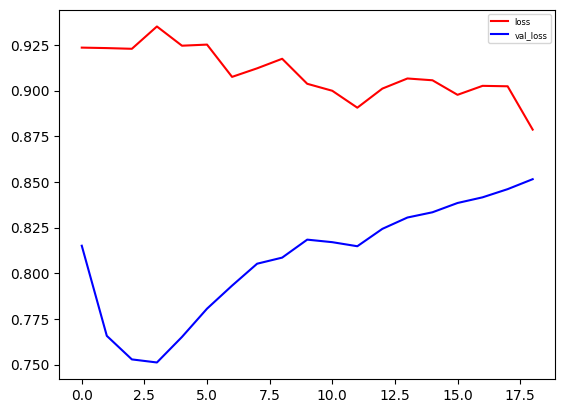

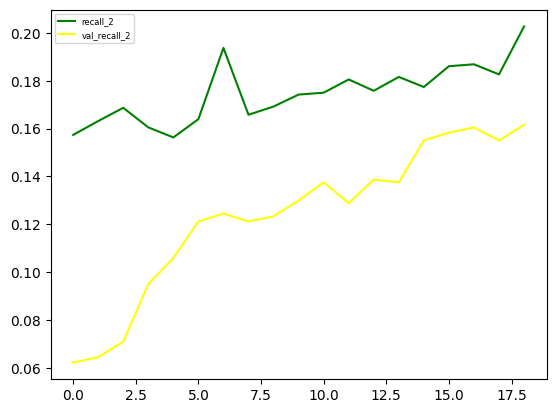

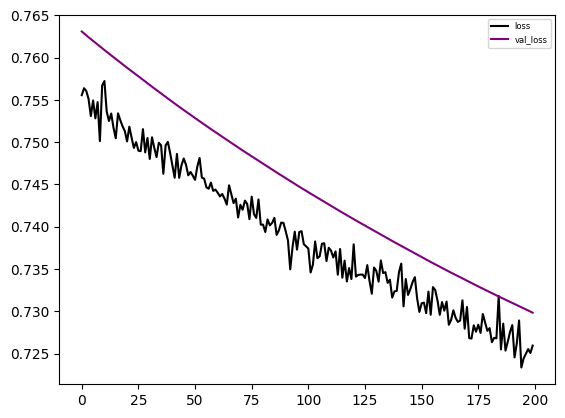

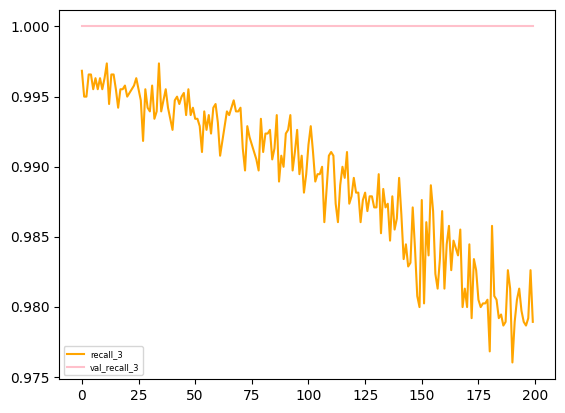

In [29]:

df_history=pd.DataFrame(historia_ensamble_res1.history)
df_history2=pd.DataFrame(historia_ensamble_res2.history)

df_history[["loss", "val_loss"]].plot(color=["red", "blue"])
df_history[["recall_2", "val_recall_2"]].plot(color=["green", "yellow"])
df_history2[["loss", "val_loss"]].plot(color=["black", "purple"])
df_history2[["recall_3", "val_recall_3"]].plot(color=["orange", "pink"])

plt.show()


In [34]:
test9=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test9=pd.DataFrame({'label': final_predictions.flatten()})

test9.drop(columns=["Unnamed: 0"], inplace=True)

test9.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test9, df_test9], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_16_prediccionT.csv", index=False)

In [44]:
test10=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

In [ ]:
df_test10=pd.DataFrame({'label': final_predictions.flatten()})

test10.drop(columns=["Unnamed: 0"], inplace=True)

test10.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test10, df_test10], axis=1)



In [51]:
predicciones.columns

Index(['id_img', 'label'], dtype='object')

TEST

In [59]:
model_test_1part=load_model(r'D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\model_ensemble_resempled2_1part.h5')
model_test_2part=load_model(r'D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\model_ensemble_resempled2_2part.h5')

# Compilar el modelo
optimizador= Adadelta(learning_rate=0.00001, rho=0.95, epsilon=1e-07, name='Adadelta')
model_test_1part.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])
model_test_2part.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

# Ruta al directorio de test
test_dir = os.path.join(file_path_train, "data_sonrisa/test")

if 'id_img' in df_test10.columns:
    test_id_img = df_test10['id_img'].values
else:
    test_id_img = []
test_label = df_test10['label'].values

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg'))  # Añadir la extensión del archivo al nombre
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg'))  # Convertir filename a str
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
print(classification_report(test_label, final_predictions))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1294
           1       1.00      1.00      1.00      1053

    accuracy                           1.00      2347
   macro avg       1.00      1.00      1.00      2347
weighted avg       1.00      1.00      1.00      2347



array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]])

In [62]:

df_test10=pd.DataFrame({'label': final_predictions.flatten()})


predicciones=pd.concat([test10, df_test10], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_17_prediccionT.csv", index=False)

<Axes: >

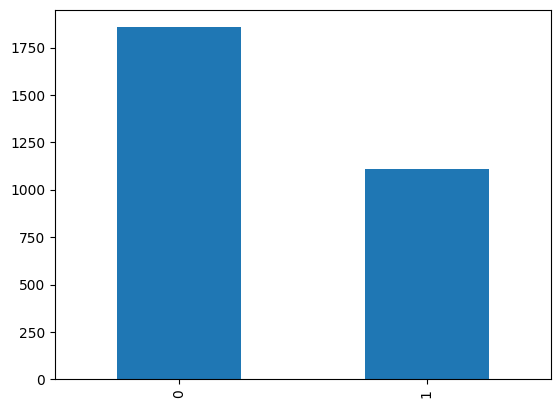

In [97]:
df_test["label"].value_counts().plot(kind="bar")

In [69]:
# Calcular las métricas de rendimiento con el umbral ajustado
accuracy_adjusted = accuracy_score(validation_classes_adjusted, y_pred_adjusted)
recall_adjusted = recall_score(validation_classes_adjusted, y_pred_adjusted)
f1_adjusted = f1_score(validation_classes_adjusted, y_pred_adjusted)
confusion_adjusted = confusion_matrix(validation_classes_adjusted, y_pred_adjusted)

print(f"Adjusted Accuracy: {accuracy_adjusted}")
print(f"Adjusted Recall: {recall_adjusted}")
print(f"Adjusted F1-score: {f1_adjusted}")
print("classification_report:\n",classification_report(validation_classes_adjusted, y_pred_adjusted))
print(f"Adjusted Confusion matrix:\n{confusion_adjusted}")

Adjusted Accuracy: 0.4651858180264844
Adjusted Recall: 0.3836317135549872
Adjusted F1-score: 0.4182156133828996
classification_report:
               precision    recall  f1-score   support

         0.0       0.47      0.55      0.51      1168
         1.0       0.46      0.38      0.42      1173

    accuracy                           0.47      2341
   macro avg       0.46      0.47      0.46      2341
weighted avg       0.46      0.47      0.46      2341

Adjusted Confusion matrix:
[[639 529]
 [723 450]]


In [70]:
print(len(validation_generator.classes))
print(len(y_pred_adjusted))

2419
2341


In [79]:
y_pred_flat = y_pred.flatten()
# Crear un nuevo DataFrame para las predicciones
predictions_df = pd.DataFrame({
    'id_img': train_set['id_img'][:len(y_pred_flat)],
    'predicciones': y_pred_flat
})

# Guardar el DataFrame de predicciones en un archivo CSV
predictions_df.to_csv("train_set_predicciones.csv", index=False)

In [80]:
pred_train= pd.read_csv("train_set_predicciones.csv")

In [20]:
# Cargar el modelo entrenado
model_test = load_model(r'D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\base_model_descongelado_inventado_imagenes.h5')

In [21]:
# Ruta al directorio de imágenes de prueba
test_dir = r'D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\data_sonrisa\test'

# Crear un subdirectorio dentro del directorio de imágenes de prueba
#os.makedirs(os.path.join(test_dir, 'images'), exist_ok=True)

# Mover todas las imágenes al subdirectorio
"""for file_name in os.listdir(test_dir):
    if file_name.endswith('.jpg'):
        shutil.move(os.path.join(test_dir, file_name), os.path.join(test_dir, 'images', file_name))"""

"for file_name in os.listdir(test_dir):\n    if file_name.endswith('.jpg'):\n        shutil.move(os.path.join(test_dir, file_name), os.path.join(test_dir, 'images', file_name))"

In [24]:
# Listas para guardar las predicciones y los nombres de los archivos
predictions = []
file_names = []

# Procesar las imágenes en lotes
for i in range(len(test_generator)):
    # Obtener el lote de imágenes
    images_batch = test_generator[i]
    
    # Hacer las predicciones
    predictions_batch = model.predict(images_batch)
    
    # Guardar las predicciones
    predictions.extend(predictions_batch.flatten())
    
    # Guardar los nombres de los archivos
    file_names_batch = test_generator.filenames[i*test_generator.batch_size:(i+1)*test_generator.batch_size]# iterar sobre los nombres de los archivos
    file_names.extend(file_names_batch)

# Crear un DataFrame con las predicciones
predictions_df = pd.DataFrame({
    'file_name': [file_name.split('.')[0] for file_name in file_names],#crea una columna con el nombre de la imagen sin la extension(.split)
    'label': predictions
})

1/1 [==============================] - 0s 40ms/step


In [25]:
print(len(test_generator.filenames))
print(len(y_pred.flatten()))


2964
2944


In [54]:
df.to_csv("predicciones/1_predictions_descongel_mas_imagenes.csv",index=False)

In [68]:
sample= pd.read_csv(os.path.join(file_path,"sample_submission.csv"))

In [97]:
sample.head()

,id_img,label
0,29622,sadness
1,6449,happy
2,2492,happy
3,33988,happy
4,19975,sadness


In [99]:
sample.shape

(2964, 2)

# MODELO  EfficientNet

In [66]:
#preentrenamos nuestra imagenets train con un modelo efficientnet con la ultima capa en false
#model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(160, 160, 3))
model = EfficientNetB1(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
#congelamos las capas del modelo
#model.trainable = False
#descogelamos las 20 ultimas capas
for layer in model.layers[-20:]:
    layer.trainable = True
    
#creamos un modelo secuencial
model = Sequential([
    model,
    Flatten(),
    Dense(1024, activation='leaky_relu'),
    Dropout(0.2),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(256, activation='relu'),
    Dense(128,activation="relu"),
    Dense(64,activation="relu", kernel_regularizer=l1(0.001)),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
  
    
])
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb1 (Functional)  (None, 2, 2, 1280)       6575239   
                                                                 
 flatten_6 (Flatten)         (None, 5120)              0         
                                                                 
 dense_18 (Dense)            (None, 1024)              5243904   
                                                                 
 dropout_6 (Dropout)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 512)               524800    
                                                                 
 dense_20 (Dense)            (None, 256)               131328    
                                                                 
 dense_21 (Dense)            (None, 128)              

In [64]:

# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [67]:
#optimizador=SGD(learning_rate=0.001, momentum=0.9, nesterov=True, decay=0.0001, clipvalue=0.7)
optimizador= Adamax(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax')
                
#compilamos el modelo
model.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=10, verbose=1)
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]

#entrenamos el modelo
historia3=model.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=callbacks_list)


Epoch 1/100
303/303 [==============================] - 42s 98ms/step - loss: 2.0415 - recall_26: 0.0785 - val_loss: 1.9971 - val_recall_26: 0.0010 - lr: 1.0000e-04
Epoch 2/100
303/303 [==============================] - 29s 95ms/step - loss: 1.9427 - recall_26: 0.1425 - val_loss: 1.9219 - val_recall_26: 0.0942 - lr: 1.0000e-04
Epoch 3/100
303/303 [==============================] - 30s 97ms/step - loss: 1.8580 - recall_26: 0.2483 - val_loss: 1.8339 - val_recall_26: 0.2665 - lr: 1.0000e-04
Epoch 4/100
303/303 [==============================] - 28s 94ms/step - loss: 1.7808 - recall_26: 0.3085 - val_loss: 1.7723 - val_recall_26: 0.3303 - lr: 1.0000e-04
Epoch 5/100
303/303 [==============================] - 28s 91ms/step - loss: 1.7052 - recall_26: 0.3670 - val_loss: 1.6827 - val_recall_26: 0.2888 - lr: 1.0000e-04
Epoch 6/100
303/303 [==============================] - 30s 100ms/step - loss: 1.6409 - recall_26: 0.4194 - val_loss: 1.6634 - val_recall_26: 0.4012 - lr: 1.0000e-04
Epoch 7/100
303

In [95]:
y_pred_prob = model.predict(validation_generator)
y_pred = (y_pred_prob > 0.5).astype(int)

print("classification_report:\n",classification_report(validation_generator.classes, y_pred))
display(confusion_matrix(validation_generator.classes, y_pred))

#model.save(r'D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\modelo_efficent2.h5', save_format="tf")

76/76 [==============================] - 6s 84ms/step
classification_report:
               precision    recall  f1-score   support

           0       0.59      0.56      0.58      1432
           1       0.41      0.44      0.42       987

    accuracy                           0.51      2419
   macro avg       0.50      0.50      0.50      2419
weighted avg       0.52      0.51      0.51      2419



array([[804, 628],
       [556, 431]], dtype=int64)

<Axes: >

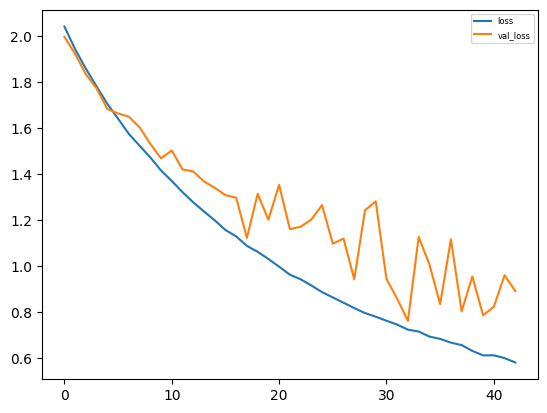

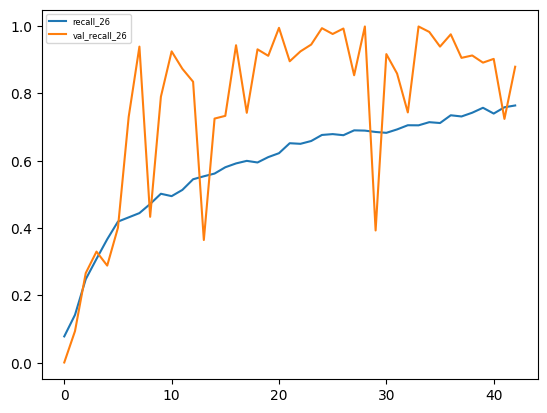

In [70]:
df_history=pd.DataFrame(historia3.history)
df_history[['loss','val_loss']].plot()
df_history[['recall_26','val_recall_26']].plot()

In [71]:
test=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test=pd.DataFrame({'label': final_predictions.flatten()})

test.drop(columns=["Unnamed: 0"], inplace=True)

test.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_18_prediccionT.csv", index=False)

## MODELO EfficientNetB4- resultado totalmente desajustado y graficas malas (no guardado)

In [80]:
# Cargar el modelo preentrenado InceptionResNetV2 con sus pesos y quitando la capa de salida
base_model = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#congelamos las capas del modelo
base_model.layers[-20].trainable = False# entrenamos las ultimas 3 capas

#creamos un modelo secuencial
ultima_capa = base_model.output
x = Flatten()(ultima_capa)
X= Dense(1024, activation='relu', kernel_regularizer=l2(0.001))(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x= Dense(1024, activation='relu')(x)
X= Dense(1024, activation='relu', kernel_regularizer=l1(0.001))(x)
x= Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
out= Dense(1, activation='sigmoid')(x)

# Añadir nuestro modelo personalizado a la base
model_effb4 = Model(inputs=base_model.input, outputs=out)

model_effb4.summary()


Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 rescaling_6 (Rescaling)        (None, 48, 48, 3)    0           ['input_8[0][0]']                
                                                                                                  
 normalization_3 (Normalization  (None, 48, 48, 3)   7           ['rescaling_6[0][0]']            
 )                                                                                                
                                                                                                  
 rescaling_7 (Rescaling)        (None, 48, 48, 3)    0           ['normalization_3[0][0]']  

In [122]:
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)

train_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [83]:
optmizador= Adamax(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax')

model_effb4.compile(optimizer=optimizador, loss="binary_crossentropy", metrics=[Recall()])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=15, verbose=1)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)

callbacks_list = [reduce_lr, early_stopping]

tf.data.experimental.enable_debug_mode()

historia6=model_effb4.fit(train_generator, validation_data=validation_generator, epochs=200, callbacks=callbacks_list)

Epoch 1/200
303/303 [==============================] - 67s 170ms/step - loss: 0.6887 - recall_28: 0.1433 - val_loss: 0.6770 - val_recall_28: 0.0051 - lr: 1.0000e-05
Epoch 2/200
303/303 [==============================] - 52s 170ms/step - loss: 0.6869 - recall_28: 0.1301 - val_loss: 0.6877 - val_recall_28: 0.0456 - lr: 1.0000e-05
Epoch 3/200
303/303 [==============================] - 50s 166ms/step - loss: 0.6816 - recall_28: 0.1369 - val_loss: 0.6793 - val_recall_28: 0.0456 - lr: 1.0000e-05
Epoch 4/200
303/303 [==============================] - 46s 152ms/step - loss: 0.6821 - recall_28: 0.1362 - val_loss: 0.6721 - val_recall_28: 0.0790 - lr: 1.0000e-05
Epoch 5/200
303/303 [==============================] - 46s 151ms/step - loss: 0.6793 - recall_28: 0.1438 - val_loss: 0.6757 - val_recall_28: 0.0760 - lr: 1.0000e-05
Epoch 6/200
303/303 [==============================] - 48s 159ms/step - loss: 0.6828 - recall_28: 0.1309 - val_loss: 0.6748 - val_recall_28: 0.1155 - lr: 1.0000e-05
Epoch 7/20

In [96]:
y_pred_prob = model_effb4.predict(validation_generator)
y_pred= (y_pred_prob > 0.4).astype(int)
print(classification_report(validation_generator.classes, y_pred))

#model_effb4.save(r"D:\Cursos\REPOSITORIOS\SONRISAS Y LAGRAMAS\modelos\modelo_effb4")

76/76 [==============================] - 6s 80ms/step
              precision    recall  f1-score   support

           0       0.58      0.48      0.53      1432
           1       0.40      0.51      0.45       987

    accuracy                           0.49      2419
   macro avg       0.49      0.49      0.49      2419
weighted avg       0.51      0.49      0.49      2419



In [ ]:
cm=confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel("Predicted Label")
plt.ylabel("validation_generator_clases")
plt.show()

Text(0, 0.5, 'validation_generator_clases')

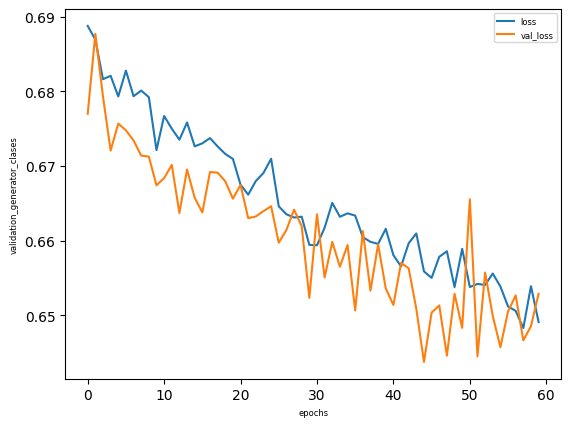

In [85]:
df_history = pd.DataFrame(historia6.history)
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("validation_generator_clases")

Text(0, 0.5, 'recall')

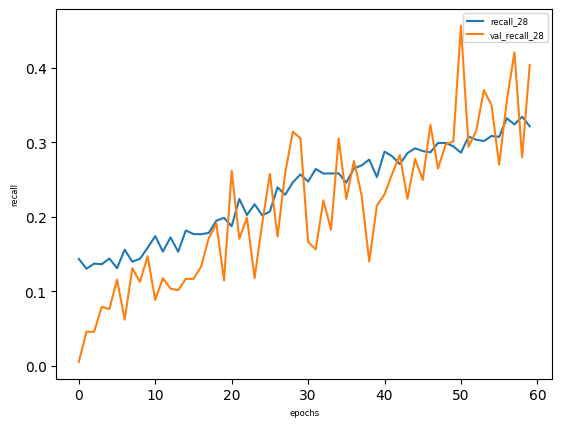

In [86]:
df_history = pd.DataFrame(historia6.history)
df_history[["recall_28","val_recall_28"]].plot();
plt.xlabel("epochs")
plt.ylabel("recall")

In [87]:
test=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test=pd.DataFrame({'label': y_pred.flatten()})

test.drop(columns=["Unnamed: 0"], inplace=True)

test.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_19_prediccionT.csv", index=False)

# MODELO INEPTIONRESNETV2 - NO VALE MINIMO DE IMAGENES 75X75 Y NO DA BUENOS RESULTADOS

In [155]:
# Directorio de las imágenes
dir_train = r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\data_sonrisa\train"


In [152]:
with tf.device('/CPU:0'):
    # Cargar el modelo preentrenado InceptionResNetV2 con sus pesos y quitando la capa de salida
    base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

for layer in base_model.layers[:-20]:
    layer.trainable = False

# Añadir nuevas capas al final del modelo
last_layer = base_model.output
x = Flatten()(last_layer)
x = Dense(512, activation='relu', kernel_regularizer=l1(0.001))(x)
x = Dense(256, activation='relu')(x),
x = Dropout(0.2)(x)
x = Dense(128, activation='relu')(x)
x = Dense(64, activation='relu')(x)
out = Dense(1, activation='sigmoid')(x)

# nuevo modelo con las capas añadidas
model_incres = Model(inputs=base_model.input, outputs=out)

model_incres.summary()



Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_32 (InputLayer)          [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d_3426 (Conv2D)           (None, 37, 37, 32)   864         ['input_32[0][0]']               
                                                                                                  
 batch_normalization_3420 (Batc  (None, 37, 37, 32)  96          ['conv2d_3426[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_3420 (Activation)   (None, 37, 37, 32)   0           ['batch_normalization_3420

In [160]:
train_datagen = ImageDataGenerator(
    #rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    #vertical_flip=True,   # VOLTEO VERTICAL
)

train_generator = train_datagen.flow_from_directory(os.path.dirname(dir_train), target_size=(75, 75), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(os.path.dirname(dir_train), target_size=(75, 75), batch_size=32, class_mode='binary', subset='validation')

Found 12054 images belonging to 2 classes.
Found 3012 images belonging to 2 classes.


In [147]:
validation_generator.image_shape

(75, 75, 3)

In [153]:
# Compilar el modelo
optimizador= Adadelta(learning_rate=0.00001, rho=0.95, epsilon=1e-07, name='Adadelta')
model_incres.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

reduce_lr=ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, verbose=1, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)
early_stoppping=tf.keras.callbacks.EarlyStopping(monitor="loss", verbose=1, mode="auto", min_delta=0.0001, patience=3, restore_best_weights=True)
callback=[reduce_lr, early_stopping]
with tf.device('/CPU:0'):
    historia= model_incres.fit(train_generator, validation_data=validation_generator, epochs=20, callbacks=callback)

Epoch 1/20


ValueError: in user code:

    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\engine\training.py", line 994, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\engine\training.py", line 1052, in compute_loss
        return self.compiled_loss(
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\losses.py", line 272, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\losses.py", line 2162, in binary_crossentropy
        backend.binary_crossentropy(y_true, y_pred, from_logits=from_logits),
    File "c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\keras\backend.py", line 5677, in binary_crossentropy
        return tf.nn.sigmoid_cross_entropy_with_logits(

    ValueError: `logits` and `labels` must have the same shape, received ((1, None, 1) vs (None,)).


In [19]:
# Obtener las predicciones del modelo en el conjunto de validación
y_pred_prob = model.predict(val_generator)
# convertir las probabilidades en etiquetas de clase binarias, en caso que sea >0.5 sera 1 y si no 0
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular las métricas de rendimiento
accuracy = accuracy_score(val_generator.classes, y_pred)
recall = recall_score(val_generator.classes, y_pred)
f1 = f1_score(val_generator.classes, y_pred)
confusion = confusion_matrix(val_generator.classes, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("classification_report:\n",classification_report(val_generator.classes, y_pred))
print(f"Confusion matrix:\n{confusion}")


95/95 [==============================] - 28s 290ms/step
Accuracy: 0.8037848605577689
Recall: 1.0
F1-score: 0.8911802614619776
classification_report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       592
           1       0.80      1.00      0.89      2420

    accuracy                           0.80      3012
   macro avg       0.90      0.50      0.45      3012
weighted avg       0.84      0.80      0.72      3012

Confusion matrix:
[[   1  591]
 [   0 2420]]


In [20]:
#VAMOSA A PROBAR AUMENTYAR EL NUMERO DE IMAGENES Y QUYITAR LAS ULTIMAS CAPAS DEL PREMODELO

In [157]:
#generamos mas imagenes girandolas y desplazandolas y volteandolas
datagen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                             validation_split=0.2, 
                             rotation_range=20, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             horizontal_flip=True)

#creamos los generadores de imagenes
train_generator = datagen.flow_from_directory(
    os.path.dirname(dir_train),
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary',
    subset='training')

#creamos los generadores de imagenes
val_generator = datagen.flow_from_directory(
    os.path.dirname(dir_train),
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary',
    subset='validation')


Found 12054 images belonging to 2 classes.
Found 3012 images belonging to 2 classes.


In [23]:
# Cargar el modelo preentrenado InceptionResNetV2 con sus pesos y quitando la capa de salida
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

# Congelar las capas del modelo base excepto las últimas 40
for layer in base_model.layers[:-40]:
    layer.trainable = False

# Añadir nuevas capas al final del modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)


# nuevo modelo con las capas añadidas
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=2, verbose=1)

#detiene el entrenamiento si la metrica no mejora
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]


In [24]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_406 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_406 (Batch  (None, 149, 149, 32  96         ['conv2d_406[0][0]']             
 Normalization)                 )                                                           

In [26]:
# Entrenar el modelo
model.fit(train_generator, validation_data=val_generator, batch_size=64, epochs=50, callbacks=callbacks_list)

# Guardar el modelo
model.save('modelo_inception_40capas_volteadas.h5')

Epoch 1/50
377/377 [==============================] - 275s 729ms/step - loss: 0.5081 - accuracy: 0.8032 - val_loss: 0.5128 - val_accuracy: 0.8035 - lr: 1.0000e-04
Epoch 2/50
377/377 [==============================] - 274s 727ms/step - loss: 0.4999 - accuracy: 0.8032 - val_loss: 0.5164 - val_accuracy: 0.8035 - lr: 1.0000e-04
Epoch 3/50
377/377 [==============================] - ETA: 0s - loss: 0.4985 - accuracy: 0.8032
Epoch 3: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
377/377 [==============================] - 272s 722ms/step - loss: 0.4985 - accuracy: 0.8032 - val_loss: 0.5204 - val_accuracy: 0.8035 - lr: 1.0000e-04


In [27]:
# Obtener las predicciones del modelo en el conjunto de validación
y_pred_prob = model.predict(val_generator)
# convertir las probabilidades en etiquetas de clase binarias, en caso que sea >0.5 sera 1 y si no 0
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular las métricas de rendimiento
accuracy = accuracy_score(val_generator.classes, y_pred)
recall = recall_score(val_generator.classes, y_pred)
f1 = f1_score(val_generator.classes, y_pred)
confusion = confusion_matrix(val_generator.classes, y_pred)


95/95 [==============================] - 56s 555ms/step


c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\victo\anaconda3\envs\SD-kerascv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       592\n           1       0.80      1.00      0.89      2420\n\n    accuracy                           0.80      3012\n   macro avg       0.40      0.50      0.45      3012\nweighted avg       0.65      0.80      0.72      3012\n'

# MODELO RESNET50 - RESULTADO BIEN M PERO NO ME GUSTAN LAS GRAFICAS (NO GUARDADO)

In [159]:
# Cargar el modelo preentrenado InceptionResNetV2 con sus pesos y quitando la capa de salida
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#congelamos las capas del modelo
base_model.layers[-3].trainable = False# entrenamos las ultimas 3 capas

#creamos un modelo secuencial
ultima_capa = base_model.output
x = Flatten()(ultima_capa)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
out= Dense(1, activation='sigmoid')(x)

# Añadir nuestro modelo personalizado a la base
model_custom4 = Model(inputs=base_model.input, outputs=out)

model_custom4.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 54, 54, 3)    0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 24, 24, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1_conv[0][0]']             
                                                                                            

In [153]:
# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [154]:
optimizador= Adamax(learning_rate=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name='Adamax', clipvalue=0.7, clipnorm=1.0, decay=0.0001)

#compilamos el modelo
model_custom4.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss', patience=15, verbose=1)

#detiene el entrenamiento si la metrica no mejora
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=15,restore_best_weights=True)

callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]


#para ver si hay errores en el dataset
tf.data.experimental.enable_debug_mode()

#entrenamos el modelo
historia5=model_custom4.fit(train_generator, validation_data=validation_generator, epochs=100, callbacks=callbacks_list)

Epoch 1/100
303/303 [==============================] - 57s 151ms/step - loss: 0.7054 - recall_8: 0.3171 - val_loss: 206.5485 - val_recall_8: 1.0000 - lr: 1.0000e-05
Epoch 2/100
303/303 [==============================] - 46s 152ms/step - loss: 0.6771 - recall_8: 0.3713 - val_loss: 318.4256 - val_recall_8: 0.9767 - lr: 1.0000e-05
Epoch 3/100
303/303 [==============================] - 49s 163ms/step - loss: 0.6590 - recall_8: 0.4204 - val_loss: 16.6513 - val_recall_8: 0.6515 - lr: 1.0000e-05
Epoch 4/100
303/303 [==============================] - 45s 147ms/step - loss: 0.6569 - recall_8: 0.4280 - val_loss: 0.8773 - val_recall_8: 0.5035 - lr: 1.0000e-05
Epoch 5/100
303/303 [==============================] - 48s 158ms/step - loss: 0.6439 - recall_8: 0.4568 - val_loss: 0.7947 - val_recall_8: 0.5522 - lr: 1.0000e-05
Epoch 6/100
303/303 [==============================] - 49s 161ms/step - loss: 0.6373 - recall_8: 0.4644 - val_loss: 0.7209 - val_recall_8: 0.4549 - lr: 1.0000e-05
Epoch 7/100
303/3

In [155]:
#calcular las predicciones
y_pred_prob = model_custom2.predict(validation_generator)
# convertir las probabilidades en etiquetas de clase binarias, en caso que sea >0.5 sera 1 y si no 0
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular las métricas de rendimiento
print(classification_report(validation_generator.classes, y_pred))

# Guardar el modelo
#model_custom4.save('modelo_inception_40capas_volteadas3.h5')

76/76 [==============================] - 10s 87ms/step
              precision    recall  f1-score   support

           0       0.59      0.60      0.60      1432
           1       0.41      0.41      0.41       987

    accuracy                           0.52      2419
   macro avg       0.50      0.50      0.50      2419
weighted avg       0.52      0.52      0.52      2419



<Figure size 600x600 with 0 Axes>

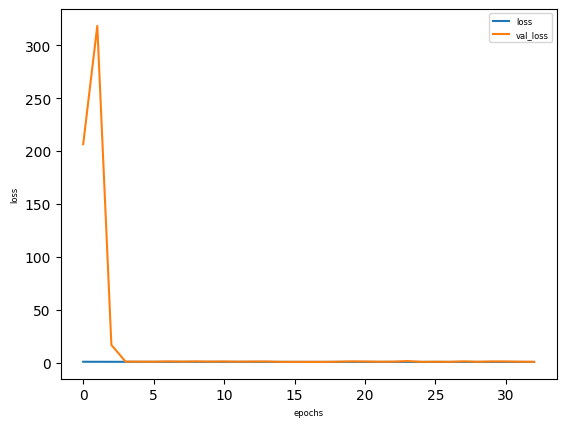

In [157]:
df_history = pd.DataFrame(historia5.history)
plt.figure(figsize=(6, 6))
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");


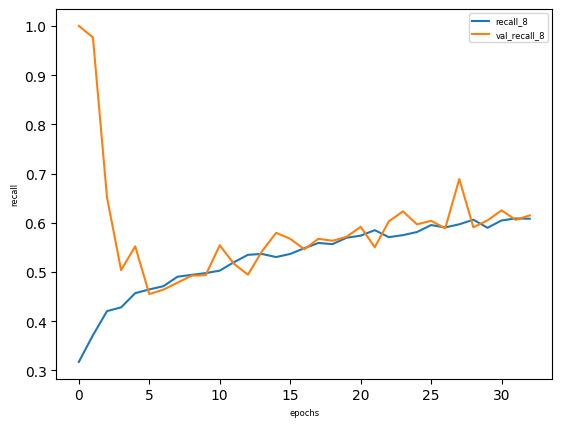

In [158]:
df_history[['recall_8','val_recall_8']].plot();
plt.xlabel("epochs")
plt.ylabel("recall");

# MODELO DENSENET201

In [208]:
#preentrenamos el modelo densenet201, sin la ultima capa y con pesos imagenet
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

#congelamos las capas del modelo
base_model.layers[-10].trainable = False# entrenamos las ultimas 10 capas

#creamos un modelo secuencial
ultima_capa = base_model.output
x = Flatten()(ultima_capa)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
X= Dense(1024, activation='relu')(x)
x= Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
out= Dense(1, activation='sigmoid')(x)

# Añadir nuestro modelo personalizado a la base
model_custom2 = Model(inputs=base_model.input, outputs=out)

model_custom2.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 54, 54, 3)   0           ['input_36[0][0]']               
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d_2[0][0]']       
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']      

In [209]:
# Crear un generador de imágenes, que aumenta las imágenes de entrenamiento girando, desplazando y volteando las mismas
train_datagen = ImageDataGenerator(
    rescale=1./255, # LAS ESCALO PARA QUE ESTEN ENTRE 0 Y 1
    validation_split=0.2, 
    rotation_range=20, # RANGO DE ROTACIÓN
    width_shift_range=0.2, # RANGO DE DESPLAZAMIENTO HORIZONTAL
    height_shift_range=0.2, # RANGO DE DESPLAZAMIENTO VERTICAL
    horizontal_flip=True,    # VOLTEO HORIZONTAL
    vertical_flip=True,   # VOLTEO VERTICAL
    shear_range=0.2,  # Parámetro de inclinación de las imágenes
    zoom_range=0.2, # RANGO DE ZOOM
    fill_mode='nearest',# MODO DE RELLENO DE LOS PÍXELES
    brightness_range=[0.2, 1.0], # RANGO DE BRILLO DE LAS IMÁGENES
    channel_shift_range=0.2 # RANGO DE CAMBIO DE CANAL de color de las imágenes
)


#creo un conjunto de train y  validacion de las imagnes del train
train_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory('data_sonrisa/train', target_size=(48, 48), batch_size=32, class_mode='binary', subset='validation')

Found 9683 images belonging to 2 classes.
Found 2419 images belonging to 2 classes.


In [213]:

optimizador= Adamax(
    learning_rate=0.00001,
    beta_1=0.9,# factor de decaimiento  del gradiente descendente
    beta_2=0.999, epsilon=1e-07,# evitar la division por 0
    name='Adamax', 
    clipvalue=0.7,# limita el valor de los gradientes    
    clipnorm=1.0,
    decay=0.0001)# tasa de decaimiento del learning rate

#compilamos el modelo
model_custom2.compile(optimizer=optimizador, loss='binary_crossentropy', metrics=[Recall()])

#reduce la tasa de aprendizaje cuando el rendimiento del conj. val no mejora
reduce_lr_callbacks = ReduceLROnPlateau(monitor='val_loss',
                                        patience=15,
                                        verbose=1,
                                        factor=0.2,#factor por el que se reduce la tasa de aprendizaje
                                        min_lr=0.00001,#minimo valor de la tasa de aprendizaje
                                        mode='auto',#modo de reduccion de la tasa de aprendizaje
                                        min_delta=0.0001,#minimo cambio en la metrica para considerar que ha mejorado
                                        cooldown=0)#numero de epocas que esperar antes de aplicar el nuevo learning rate
                                        
#detiene el entrenamiento si la metrica no mejora
early_stopping_callbacks = tf.keras.callbacks.EarlyStopping(patience=15,
                                                            restore_best_weights=True, #restaura los mejores pesos
                                                            monitor="loss", 
                                                            verbose=1, 
                                                            mode="auto", 
                                                            min_delta=0.0001)

callbacks_list = [reduce_lr_callbacks, early_stopping_callbacks]


#entrenamos el modelo
historia4=model_custom2.fit(train_generator, validation_data=validation_generator, epochs=200, callbacks=callbacks_list)

Epoch 1/200
303/303 [==============================] - 123s 294ms/step - loss: 0.6797 - recall_40: 0.0324 - val_loss: 0.6750 - val_recall_40: 0.0000e+00 - lr: 1.0000e-05
Epoch 2/200
303/303 [==============================] - 83s 275ms/step - loss: 0.6702 - recall_40: 0.0000e+00 - val_loss: 0.6713 - val_recall_40: 0.0000e+00 - lr: 1.0000e-05
Epoch 3/200
303/303 [==============================] - 86s 285ms/step - loss: 0.6639 - recall_40: 0.0000e+00 - val_loss: 0.6582 - val_recall_40: 0.0000e+00 - lr: 1.0000e-05
Epoch 4/200
303/303 [==============================] - 90s 296ms/step - loss: 0.6543 - recall_40: 0.0000e+00 - val_loss: 0.6447 - val_recall_40: 0.0000e+00 - lr: 1.0000e-05
Epoch 5/200
303/303 [==============================] - 86s 282ms/step - loss: 0.6430 - recall_40: 0.0051 - val_loss: 0.6259 - val_recall_40: 0.0243 - lr: 1.0000e-05
Epoch 6/200
303/303 [==============================] - 88s 290ms/step - loss: 0.6292 - recall_40: 0.1243 - val_loss: 0.6213 - val_recall_40: 0.321

In [215]:
#calcular las predicciones
y_pred_prob = model_custom2.predict(validation_generator)
# convertir las probabilidades en etiquetas de clase binarias, en caso que sea >0.5 sera 1 y si no 0
y_pred = (y_pred_prob > 0.5).astype(int)

# Calcular las métricas de rendimiento
print(classification_report(validation_generator.classes, y_pred))

# Guardar el modelo
model_custom2.save('modelo_densenet201_2.h5')

76/76 [==============================] - 7s 93ms/step
              precision    recall  f1-score   support

           0       0.59      0.59      0.59      1432
           1       0.41      0.41      0.41       987

    accuracy                           0.51      2419
   macro avg       0.50      0.50      0.50      2419
weighted avg       0.51      0.51      0.51      2419



In [221]:
test=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test=pd.DataFrame({'label': y_pred.flatten()})

test.drop(columns=["Unnamed: 0"], inplace=True)

test.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_22_prediccion_densenet201.csv", index=False)

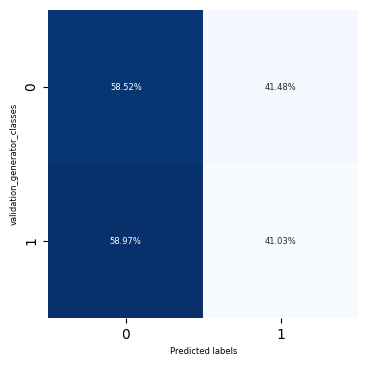

In [216]:

cm=confusion_matrix(validation_generator.classes, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(4, 4))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('validation_generator_classes');


<Figure size 600x600 with 0 Axes>

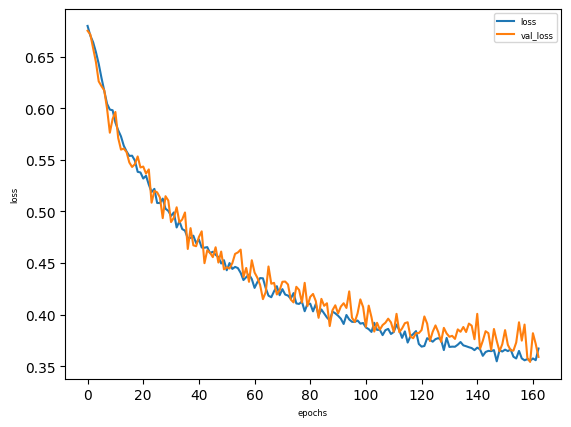

In [217]:
df_history = pd.DataFrame(historia4.history)
plt.figure(figsize=(6, 6))
df_history[["loss","val_loss"]].plot();
plt.xlabel("epochs")
plt.ylabel("loss");

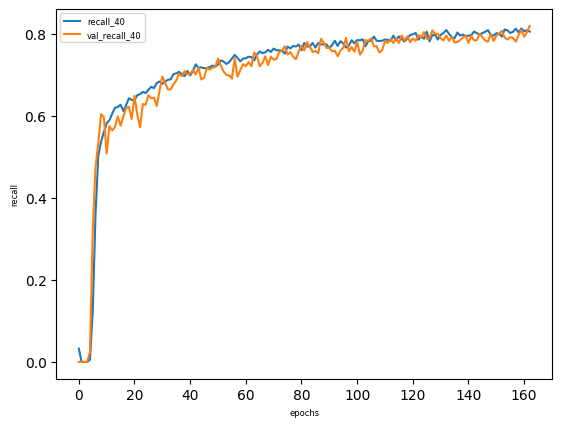

In [219]:
df_history[['recall_40','val_recall_40']].plot();
plt.xlabel("epochs")
plt.ylabel("recall");

PROBAMOS TEST

In [222]:
model_test=load_model('modelo_densenet201_2.h5')

test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

test_id_img = test['id_img'].values
test_label = validation_generator.classes

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) #convertir filename a str para que pueda leer la imagen y extension
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg')) 
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)

# Convertir las imágenes de escala de grises a RGB
test_images_rgb = np.stack([test_images]*3, axis=-1)

# Hacer predicciones con el modelo
y_pred = model_test.predict(test_images_rgb)
y_pred = (y_pred > 0.5).astype(int)

y_pred=y_pred[:len(test_label)]

# Calcular la precisión y el recall
accuracy = accuracy_score(test_label, y_pred)
recall = recall_score(test_label, y_pred)

print(classification_report(test_label, y_pred))

93/93 [==============================] - 6s 41ms/step
              precision    recall  f1-score   support

           0       0.74      0.90      0.81      1432
           1       0.79      0.53      0.63       987

    accuracy                           0.75      2419
   macro avg       0.76      0.72      0.72      2419
weighted avg       0.76      0.75      0.74      2419



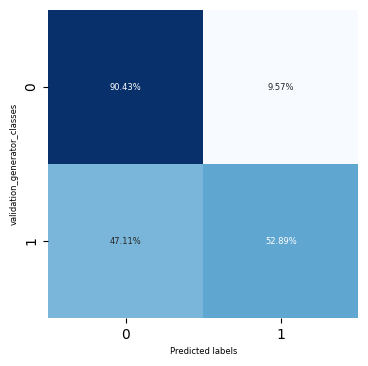

In [223]:
cm=confusion_matrix(test_label, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(4, 4))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('validation_generator_classes');

GUARDAR PREDICCION

In [224]:
test=pd.read_csv(os.path.join(file_path_train,"test_set.csv"))

df_test=pd.DataFrame({'label': y_pred.flatten()})

test.drop(columns=["Unnamed: 0"], inplace=True)

test.drop(columns=["paths"], inplace=True)

predicciones=pd.concat([test, df_test], axis=1)

predicciones["label"]= predicciones["label"].apply(lambda x: "happy" if x==0 else "sadness")

predicciones.to_csv(r"D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_23_prediccionT.csv", index=False)

graficas modelo_densenet201_volteadas3.h5

TEST

In [89]:
test= pd.read_csv(os.path.join(file_path_train,"test_set.csv"))
test.drop(columns=["Unnamed: 0"], inplace=True)

In [90]:
model_test=load_model('modelo_densenet201_volteadas2.h5')

In [92]:
test_dir= os.path.join(file_path_train, "data_sonrisa/test/images")

test_id_img = test['id_img'].values
test_label = validation_generator.classes

# Crear una lista vacía para almacenar las imágenes
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg'))  # Añadir la extensión del archivo al nombre
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)
test_images = []

# Iterar sobre todos los nombres de los archivos
for filename in test_id_img:
    # Cargar la imagen
    img = Image.open(os.path.join(test_dir, str(filename) + '.jpg'))  # Convertir filename a str
    # Convertir la imagen a un array de numpy y normalizarla
    img = np.array(img) / 255.0
    # Añadir la imagen a la lista de imágenes
    test_images.append(img)

# Convertir la lista de imágenes en un array de numpy
test_images = np.array(test_images)

# Convertir las imágenes de escala de grises a RGB
test_images_rgb = np.stack([test_images]*3, axis=-1)

# Hacer predicciones con el modelo
y_pred = model_test.predict(test_images_rgb)
y_pred = (y_pred > 0.5).astype(int)

y_pred=y_pred[:len(test_label)]

# Calcular la precisión y el recall
accuracy = accuracy_score(test_label, y_pred)
recall = recall_score(test_label, y_pred)

print(classification_report(test_label, y_pred))

93/93 [==============================] - 7s 44ms/step
              precision    recall  f1-score   support

           0       0.76      0.91      0.83      1432
           1       0.81      0.59      0.68       987

    accuracy                           0.78      2419
   macro avg       0.79      0.75      0.76      2419
weighted avg       0.78      0.78      0.77      2419



In [93]:
test.drop(columns=["paths"], inplace=True)

In [94]:
df_test=pd.DataFrame({'label': y_pred.flatten()})

In [95]:
df_test=pd.concat([test, df_test], axis=1)

In [97]:
validation_generator.class_indices

{'happy': 0, 'sadness': 1}

In [99]:
df_test["label"]=df_test["label"].map({0:"happy",1:"sadness"})

In [100]:
df_test.head()

,id_img,label
0,10019,happy
1,10023,happy
2,10074,happy
3,10096,happy
4,10106,happy


In [101]:
df_test.shape

(2964, 2)

In [102]:
df_test.to_csv("D:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\COMP_SONRISAS_LAGRIMAS\predicciones\_6_prediccion.csv", index=False)